Purpose: Exploratory scratchpad that informed the final pipeline.

## Imports and Loading Data

In [1]:
# Import pandas and unicodedata
import pandas as pd
import unicodedata as ud

# Import movie data
tmdb_movies_raw = pd.read_csv("../data/raw/TMDB_movie_dataset_v11.csv")

## Data Exploration

In [2]:
# Quick view of movie data
tmdb_movies_raw.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
# View columns
tmdb_movies_raw.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [4]:
# View column info
tmdb_movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284604 entries, 0 to 1284603
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1284604 non-null  int64  
 1   title                 1284589 non-null  object 
 2   vote_average          1284604 non-null  float64
 3   vote_count            1284604 non-null  int64  
 4   status                1284604 non-null  object 
 5   release_date          1032687 non-null  object 
 6   revenue               1284604 non-null  int64  
 7   runtime               1284604 non-null  int64  
 8   adult                 1284604 non-null  bool   
 9   backdrop_path         329685 non-null   object 
 10  budget                1284604 non-null  int64  
 11  homepage              133934 non-null   object 
 12  imdb_id               637685 non-null   object 
 13  original_language     1284604 non-null  object 
 14  original_title        1284589 non-

In [5]:
# Count number of rows
len(tmdb_movies_raw) # 1284604 total

1284604

In [6]:
# View sum of missing values in each column
tmdb_movies_raw.isna().sum()

id                            0
title                        15
vote_average                  0
vote_count                    0
status                        0
release_date             251917
revenue                       0
runtime                       0
adult                         0
backdrop_path            954919
budget                        0
homepage                1150670
imdb_id                  646919
original_language             0
original_title               15
overview                 282119
popularity                    0
poster_path              432933
tagline                 1105154
genres                   543626
production_companies     722384
production_countries     599837
spoken_languages         576191
keywords                 954188
dtype: int64

In [7]:
# View percentage of missing values in each column
tmdb_movies_raw.isna().sum() * 100 / len(tmdb_movies_raw)

id                       0.000000
title                    0.001168
vote_average             0.000000
vote_count               0.000000
status                   0.000000
release_date            19.610479
revenue                  0.000000
runtime                  0.000000
adult                    0.000000
backdrop_path           74.335671
budget                   0.000000
homepage                89.573908
imdb_id                 50.359410
original_language        0.000000
original_title           0.001168
overview                21.961554
popularity               0.000000
poster_path             33.701670
tagline                 86.030715
genres                  42.318567
production_companies    56.233983
production_countries    46.694312
spoken_languages        44.853589
keywords                74.278766
dtype: float64

In [8]:
# DELETE FROM FINAL
# View missing titles
tmdb_movies_raw[tmdb_movies_raw['title'].isna()][['title', 'vote_count', 'status', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']]

,title,vote_count,status,original_title,overview,popularity,tagline,genres,keywords
236487,NaN,1,Released,NaN,NaN,0.1929,NaN,"Music, History, Documentary, Mystery","muziek, mevlana, şeb-i arûs, düğün gecesi, kon..."
366989,NaN,0,Released,NaN,"In this directorial debut of Eden Ewardson, he...",0.0000,NaN,NaN,NaN
475398,NaN,0,Released,NaN,NaN,0.6000,NaN,Documentary,NaN
481690,NaN,0,Canceled,NaN,NaN,0.6000,NaN,"Horror, Mystery, Thriller",NaN
526179,NaN,0,Released,NaN,NaN,0.6000,NaN,NaN,NaN
529296,NaN,0,Released,NaN,"“My Body, My Rules, and Them” is an exploratio...",0.7500,NaN,NaN,gawad alternatibo
529555,NaN,0,Released,NaN,A hitman is tasked to take out ex-mobsters whe...,0.8610,NaN,NaN,NaN
662895,NaN,0,Canceled,NaN,A neglected homemaker has an affair behind her...,0.0000,Discover the most hidden secrets in Marta's di...,NaN,NaN
709044,NaN,0,Released,NaN,NaN,0.0000,NaN,NaN,NaN
951411,NaN,0,Released,NaN,NONE is a short film that explores the balance...,0.6000,NaN,Animation,NaN


In [9]:
# View unique status values
tmdb_movies_raw['status'].unique()

array(['Released', 'Planned', 'Post Production', 'Rumored',
       'In Production', 'Canceled'], dtype=object)

In [10]:
# DELETE FROM FINAL
# View unreleased movies (38219)
tmdb_movies_raw[tmdb_movies_raw['status'] != 'Released'][['title', 'vote_count', 'status', 'release_date', 'original_title', 'overview', 'popularity', 'genres', 'keywords']]

,title,vote_count,status,release_date,original_title,overview,popularity,genres,keywords
143535,Logan's Run,4,Planned,NaN,Logan's Run,A remake of the dystopian 1976 science fiction...,0.898,"Action, Adventure, Drama, Science Fiction, Thr...","based on novel or book, dystopia, remake"
149100,Force 3,3,Planned,NaN,Force 3,NaN,0.600,"Thriller, Action",NaN
159324,Imagine Agents,3,Planned,NaN,Imagine Agents,Based off the Boom! comic.,0.600,NaN,NaN
169066,Firefighters,3,Planned,NaN,Firefighters,The true story of a dozen female prisoners as ...,0.600,Drama,NaN
170691,Mogul: The Gulshan Kumar Story,3,Planned,NaN,Mogul: The Gulshan Kumar Story,"Biopic of Gulshan Kumar, the founder of the In...",4.583,"Drama, Music","biography, record label"
...,...,...,...,...,...,...,...,...,...
1284337,She's Still Here,0,Planned,NaN,She's Still Here,Tormented by the vengeful spirit of his deceas...,0.840,"Horror, Thriller",NaN
1284366,Stepdude,0,Planned,NaN,Stepdude,NaN,0.600,Comedy,NaN
1284444,Suddenly,0,In Production,2023-12-06,Soudain seuls,Vincent and Laura are a passionate but volatil...,2.266,"Thriller, Drama, Adventure",based on novel or book
1284451,Flesh & Oil,0,Post Production,NaN,Flesh & Oil,A disgruntled Factory Worker learns to let go ...,0.600,"Drama, Science Fiction",NaN


## Data Processing/Cleaning

### Creating Clean Working Dataframe

In [11]:
# Create new df for data cleaning
movies_clean = tmdb_movies_raw.copy()

### Creating Drops Log Dataframe & Add Unreleased Films

In [12]:
# Create df for dropped films and add unreleased films to it
drops_log = movies_clean.loc[movies_clean['status'] != 'Released'].copy()

### Removing Unreleased Films

In [13]:
# Create reason column and add unreleased reason for each row
drops_log['drop_reason'] = 'unreleased (status != "Released")'

In [14]:
# Confirm reason column has been added
drops_log.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'drop_reason'],
      dtype='object')

In [15]:
# Count drops df (38219)
len(drops_log)

38219

In [16]:
# View and check drops df
drops_log.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,drop_reason
143535,413749,Logan's Run,7.8,4,Planned,NaN,0,0,False,NaN,...,A remake of the dystopian 1976 science fiction...,0.898,NaN,NaN,"Action, Adventure, Drama, Science Fiction, Thr...","Silver Pictures, Warner Bros. Pictures",United States of America,English,"based on novel or book, dystopia, remake","unreleased (status != ""Released"")"
149100,465660,Force 3,10.0,3,Planned,NaN,0,0,False,NaN,...,NaN,0.600,NaN,NaN,"Thriller, Action",NaN,India,Hindi,NaN,"unreleased (status != ""Released"")"
159324,345933,Imagine Agents,10.0,3,Planned,NaN,0,0,False,NaN,...,Based off the Boom! comic.,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"unreleased (status != ""Released"")"
169066,528319,Firefighters,10.0,3,Planned,NaN,0,0,False,NaN,...,The true story of a dozen female prisoners as ...,0.600,NaN,NaN,Drama,"LuckyChap Entertainment, Automatik Entertainme...",United States of America,English,NaN,"unreleased (status != ""Released"")"
170691,496323,Mogul: The Gulshan Kumar Story,10.0,3,Planned,NaN,0,0,False,NaN,...,"Biopic of Gulshan Kumar, the founder of the In...",4.583,/dHC9WLLwsC6x1hs18h8p5IZCn5v.jpg,The emperor of music.,"Drama, Music",T-Series,India,Hindi,"biography, record label","unreleased (status != ""Released"")"


In [17]:
# Create df for unreleased films
unreleased_d = drops_log.copy()

len(unreleased_d)

38219

In [18]:
# Drop unreleased movies from df
movies_clean = movies_clean.loc[movies_clean['status'] == 'Released'].copy()

In [19]:
# Check for unreleased movies in df
movies_clean[movies_clean['status'] != 'Released']

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords


In [20]:
# Count movies_clean (1246385)
len(movies_clean)

1246385

In [21]:
# Quick view of df
movies_clean.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [22]:
# Create snapshot df for released movies
released_movies = movies_clean.copy()

In [23]:
# Quick view of released movies df
released_movies.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### Removing Status Column

In [24]:
# Remove status column
movies_clean = movies_clean.drop(columns=['status'])

In [25]:
# View columns & confirm status dropped
movies_clean.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

### Removing Adult Films & Add to Drops Log

In [26]:
# View sum of adult films (126026)
movies_clean['adult'].sum()

np.int64(126026)

In [27]:
# Create df for adult films
adult_d = movies_clean.loc[movies_clean['adult'] == True].assign(drop_reason='adult=True')

# Check length of adult df
len(adult_d)

126026

In [28]:
# Add adult films to drops df
drops_log = pd.concat([drops_log, adult_d], axis=0)

# Check drops df length
len(drops_log)

164245

In [29]:
# Drop adult films
movies_clean = movies_clean.loc[movies_clean['adult'] == False].copy()

In [30]:
# Check for adult films
movies_clean[movies_clean['adult'] == True]

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,backdrop_path,budget,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords


In [31]:
# Count movies_clean
len(movies_clean)

1120359

In [32]:
# Create snapshot df for sfw non-adult films
released_sfw = movies_clean.copy()

In [33]:
# Check released sfw df
released_sfw.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,backdrop_path,budget,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### Removing Adult Column

In [34]:
# Drop adult column
movies_clean = movies_clean.drop(columns=['adult'])

In [35]:
# View columns & check adult dropped
movies_clean.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

### Trimming Whitespace & Normalize

In [36]:
# View movies with whitespace titles
movies_clean[movies_clean['title'] == ' ']

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
517734,1166067,,0.0,0,NaN,0,0,NaN,0,NaN,...,憧れを超えた侍,,0.6,NaN,NaN,Documentary,NaN,NaN,NaN,NaN
667035,1491828,,0.0,0,NaN,0,0,NaN,0,NaN,...,Дом,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991050,468137,,0.0,0,1921-09-01,0,6,NaN,0,NaN,...,Exhibition in Reval,A look at an exhibition in Reval (now known as...,0.6,NaN,NaN,Documentary,NaN,Soviet Union,NaN,NaN


In [37]:
# Trim whitespace from titles, overviews, genres, keywords, and taglines
movies_clean = movies_clean.copy()
for col in ['title', 'overview', 'genres', 'keywords', 'tagline', 'production_companies', 'production_countries']:
    movies_clean[col] = movies_clean[col].astype('string').str.strip()

In [38]:
# Convert empties to missing values

text_cols = [c for c in ['title','overview','tagline'] if c in movies_clean]
subject_cols = [c for c in ['genres','keywords','production_companies','production_countries'] if c in movies_clean]

# Empty/whitespace -> NA
if text_cols:
    movies_clean[text_cols] = movies_clean[text_cols].replace(r'^\s*$', pd.NA, regex=True)

# Treat blank, '[]', '{}' (with or without spaces) as NA for subjects
if subject_cols:
    movies_clean[subject_cols] = movies_clean[subject_cols].replace(
        {r'^\s*$': pd.NA, r'^\[\s*\]$': pd.NA, r'^\{\s*\}$': pd.NA},
        regex=True
    )

# Quick peek: how many are missing
for c in text_cols + subject_cols:
    print(f"{c}: {movies_clean[c].isna().sum():,} NA")

title: 14 NA
overview: 246,627 NA
tagline: 963,339 NA
genres: 422,311 NA
keywords: 847,758 NA
production_companies: 677,793 NA
production_countries: 532,504 NA


In [39]:
# Normalization columns

# Normalize title
movies_clean['title_norm'] = (
    movies_clean['title'].astype('string')
      .str.normalize('NFKC')
      .str.replace(r'[\u200B\u200C\u200D\u2060\uFEFF]', '', regex=True)
      .str.replace('…', '...', regex=False)
      .str.replace('\u00A0', ' ', regex=False)
      .str.replace('[“”]', '"', regex=True).str.replace("[‘’]", "'", regex=True)
      .str.replace('[–—]', '-', regex=True).str.replace('⁄', '/', regex=False)
      .str.replace(r'\s+', ' ', regex=True).str.strip()
)

# Normalize overview
movies_clean['overview_norm'] = (
    movies_clean['overview'].astype('string')
      .str.replace(r'https?://\S+|www\.\S+', ' ', regex=True)  # drop URLs
      .str.replace(r'\s+', ' ', regex=True).str.strip()
)

# Normalize keywords
movies_clean['keywords_norm'] = movies_clean['keywords'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

# Normalize genres
movies_clean['genres_norm'] = movies_clean['genres'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

# Normalize production companies
movies_clean['companies_norm'] = movies_clean['production_companies'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

# Normalize production countries
movies_clean['countries_norm'] = movies_clean['production_countries'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

In [40]:
movies_clean.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords', 'title_norm',
       'overview_norm', 'keywords_norm', 'genres_norm', 'companies_norm',
       'countries_norm'],
      dtype='object')

In [41]:
# Convert empties in normalized fields to NA for clean dropping

for c in ['title_norm','overview_norm','keywords_norm','genres_norm']:
    movies_clean[c] = movies_clean[c].replace(r'^\s*$', pd.NA, regex=True)

### Removing Films Missing Title

In [42]:
# Count films with missing titles (14)
movies_clean['title_norm'].isna().sum()

np.int64(14)

In [43]:
# View films with missing titles
movies_clean[movies_clean['title_norm'].isna()][['title', 'title_norm', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']]

,title,title_norm,vote_count,original_title,overview,popularity,tagline,genres,keywords
236487,<NA>,<NA>,1,NaN,<NA>,0.1929,<NA>,"Music, History, Documentary, Mystery","muziek, mevlana, şeb-i arûs, düğün gecesi, kon..."
366989,<NA>,<NA>,0,NaN,"In this directorial debut of Eden Ewardson, he...",0.0000,<NA>,<NA>,<NA>
475398,<NA>,<NA>,0,NaN,<NA>,0.6000,<NA>,Documentary,<NA>
517734,<NA>,<NA>,0,憧れを超えた侍,<NA>,0.6000,<NA>,Documentary,<NA>
526179,<NA>,<NA>,0,NaN,<NA>,0.6000,<NA>,<NA>,<NA>
529555,<NA>,<NA>,0,NaN,A hitman is tasked to take out ex-mobsters whe...,0.8610,<NA>,<NA>,<NA>
667035,<NA>,<NA>,0,Дом,<NA>,0.0000,<NA>,<NA>,<NA>
709044,<NA>,<NA>,0,NaN,<NA>,0.0000,<NA>,<NA>,<NA>
951411,<NA>,<NA>,0,NaN,NONE is a short film that explores the balance...,0.6000,<NA>,Animation,<NA>
991050,<NA>,<NA>,0,Exhibition in Reval,A look at an exhibition in Reval (now known as...,0.6000,<NA>,Documentary,<NA>


In [44]:
# Create df for missing titles
missing_titles_d = movies_clean.loc[movies_clean['title_norm'].isna()].assign(drop_reason='missing:title')

# Check missing titles df
missing_titles_d[['title', 'title_norm', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']]

,title,title_norm,vote_count,original_title,overview,popularity,tagline,genres,keywords
236487,<NA>,<NA>,1,NaN,<NA>,0.1929,<NA>,"Music, History, Documentary, Mystery","muziek, mevlana, şeb-i arûs, düğün gecesi, kon..."
366989,<NA>,<NA>,0,NaN,"In this directorial debut of Eden Ewardson, he...",0.0000,<NA>,<NA>,<NA>
475398,<NA>,<NA>,0,NaN,<NA>,0.6000,<NA>,Documentary,<NA>
517734,<NA>,<NA>,0,憧れを超えた侍,<NA>,0.6000,<NA>,Documentary,<NA>
526179,<NA>,<NA>,0,NaN,<NA>,0.6000,<NA>,<NA>,<NA>
529555,<NA>,<NA>,0,NaN,A hitman is tasked to take out ex-mobsters whe...,0.8610,<NA>,<NA>,<NA>
667035,<NA>,<NA>,0,Дом,<NA>,0.0000,<NA>,<NA>,<NA>
709044,<NA>,<NA>,0,NaN,<NA>,0.0000,<NA>,<NA>,<NA>
951411,<NA>,<NA>,0,NaN,NONE is a short film that explores the balance...,0.6000,<NA>,Animation,<NA>
991050,<NA>,<NA>,0,Exhibition in Reval,A look at an exhibition in Reval (now known as...,0.6000,<NA>,Documentary,<NA>


In [45]:
# Count missing titles df (14)
len(missing_titles_d)

14

In [46]:
# Add missing title films to drops df
drops_log = pd.concat([drops_log, missing_titles_d], axis=0)

# Check drops count
len(drops_log)

164259

In [47]:
# Drop films with missing title
movies_clean = movies_clean.dropna(subset=['title_norm']).copy()

In [48]:
# Check films with missing title have been removed
movies_clean[movies_clean['title_norm'].isna()]

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,production_companies,production_countries,spoken_languages,keywords,title_norm,overview_norm,keywords_norm,genres_norm,companies_norm,countries_norm


In [49]:
# Create snapshot df for sfw non-adult films excluding missing titles
released_sfw_has_title = movies_clean.copy()

In [50]:
# Check count of movies_clean
len(movies_clean)

1120345

### Removing Films Missing Important Core Fields

In [51]:
# View films with missing overview, genres, keywords, or release_date - 903741
movies_clean[movies_clean[['overview_norm', 'genres_norm', 'keywords_norm', 'release_date']].isna().any(axis=1)][['title', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']]

,title,vote_count,original_title,overview,popularity,tagline,genres,keywords
872,The Kissing Booth 2,4796,The Kissing Booth 2,"With college decisions looming, Elle juggles h...",25.333,Rules can be broken...but so can hearts.,"Comedy, Romance",<NA>
1339,Jarhead: Law of Return,3316,Jarhead: Law of Return,"Major Ronan Jackson, an accomplished fighter p...",15.590,<NA>,War,<NA>
1860,Gabriel's Inferno,2364,Gabriel's Inferno,An intriguing and sinful exploration of seduct...,12.354,<NA>,"Romance, Drama",<NA>
2152,Where Am I Going?,2016,Quo vado?,Checco is 39 and lived his entire life with hi...,7.263,<NA>,Comedy,<NA>
2481,I Can Quit Whenever I Want,1722,Smetto quando voglio,A university researcher is fired because of th...,6.514,<NA>,Comedy,<NA>
...,...,...,...,...,...,...,...,...
1284599,Claude Nougaro: Embarquement Immediat,0,Claude Nougaro: Embarquement Immediat,Widely regarded as the singer who fused the tr...,0.600,<NA>,Music,<NA>
1284600,Amour Fou,0,Amour Fou,Take a ride through the streets of Paris with ...,0.600,<NA>,<NA>,<NA>
1284601,Die Alte Frau und das Meer,0,Die Alte Frau und das Meer,Every day an old woman fisherman goes on a boa...,0.600,<NA>,<NA>,<NA>
1284602,Weiss,0,Weiss,"He lives in a white expanse, where a monotonou...",0.600,<NA>,<NA>,"computer animation, black and white, short film"


In [52]:
# View data type for columns
movies_clean.dtypes

id                               int64
title                   string[python]
vote_average                   float64
vote_count                       int64
release_date                    object
revenue                          int64
runtime                          int64
backdrop_path                   object
budget                           int64
homepage                        object
imdb_id                         object
original_language               object
original_title                  object
overview                string[python]
popularity                     float64
poster_path                     object
tagline                 string[python]
genres                  string[python]
production_companies    string[python]
production_countries    string[python]
spoken_languages                object
keywords                string[python]
title_norm              string[python]
overview_norm           string[python]
keywords_norm           string[python]
genres_norm             s

In [53]:
# View specific data types for genres and keywords columns
movies_clean['genres_norm'].map(type).value_counts(), movies_clean['keywords_norm'].map(type).value_counts()

(genres_norm
 <class 'str'>                            698042
 <class 'pandas._libs.missing.NAType'>    422303
 Name: count, dtype: int64,
 keywords_norm
 <class 'pandas._libs.missing.NAType'>    847745
 <class 'str'>                            272600
 Name: count, dtype: int64)

In [54]:
# View specific data types for title column
movies_clean['title_norm'].map(type).value_counts()

title_norm
<class 'str'>    1120345
Name: count, dtype: int64

In [55]:
# View count of missing values in overview column
movies_clean['overview_norm'].isna().sum()

np.int64(246638)

In [56]:
# View count of missing values in overview column
movies_clean['overview'].isna().sum()

np.int64(246617)

In [57]:
# View count of missing values in genres column
movies_clean['genres_norm'].isna().sum()

np.int64(422303)

In [58]:
# View count of missing values in keywords column
movies_clean['keywords_norm'].isna().sum()

np.int64(847745)

In [59]:
# View count of missing values in release_date column
movies_clean['release_date'].isna().sum()

np.int64(213617)

In [60]:
# Create missing important fields (overview, genres, or keywords) filter
missing_core = movies_clean[['overview_norm', 'genres_norm', 'keywords_norm', 'release_date']].isna().any(axis=1)

# Count rows missing important fields
missing_core.sum()

np.int64(903741)

In [61]:
# Create df for missing important fields
missing_core_d = movies_clean.loc[missing_core].assign(drop_reason='missing_core_fields: overview,genres,keywords,release_date')

# View missing important fields df
missing_core_d.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,production_countries,spoken_languages,keywords,title_norm,overview_norm,keywords_norm,genres_norm,companies_norm,countries_norm,drop_reason
872,583083,The Kissing Booth 2,7.703,4796,2020-07-24,0,132,/wO5QSWZPBT71gMLvrRex0bVc0V9.jpg,0,https://www.netflix.com/title/81026818,...,United Kingdom,English,<NA>,The Kissing Booth 2,"With college decisions looming, Elle juggles h...",<NA>,"Comedy, Romance",Komixx Entertainment,United Kingdom,"missing_core_fields: overview,genres,keywords,..."
1339,635744,Jarhead: Law of Return,6.539,3316,2019-10-01,0,103,/kTtBDUeDZATzrTUlqHUG0ZWjg9m.jpg,0,NaN,...,"Israel, United States of America","English, Hebrew",<NA>,Jarhead: Law of Return,"Major Ronan Jackson, an accomplished fighter p...",<NA>,War,"Universal 1440 Entertainment, BUFO","Israel, United States of America","missing_core_fields: overview,genres,keywords,..."
1860,696374,Gabriel's Inferno,8.449,2364,2020-05-29,0,122,/w2uGvCpMtvRqZg6waC1hvLyZoJa.jpg,0,https://watch.passionflix.com/watch/fc15dc25-c...,...,United States of America,English,<NA>,Gabriel's Inferno,An intriguing and sinful exploration of seduct...,<NA>,"Romance, Drama",PassionFlix,United States of America,"missing_core_fields: overview,genres,keywords,..."
2152,374416,Where Am I Going?,6.800,2016,2016-01-01,75173000,86,/gCyHTnGrhUQM5jS2PWe7LFU7Npb.jpg,11089000,NaN,...,Italy,Italian,<NA>,Where Am I Going?,Checco is 39 and lived his entire life with hi...,<NA>,Comedy,"Taodue Film, Mediaset Premium",Italy,"missing_core_fields: overview,genres,keywords,..."
2481,250219,I Can Quit Whenever I Want,7.432,1722,2014-02-06,54606,100,/6BHQS2rofh2kQrktroBH4TGrtXY.jpg,2000000,NaN,...,Italy,Italian,<NA>,I Can Quit Whenever I Want,A university researcher is fired because of th...,<NA>,Comedy,"Ascent Film, Fandango, RAI Cinema",Italy,"missing_core_fields: overview,genres,keywords,..."


In [62]:
# Count missing important fields df
len(missing_core_d)

903741

In [63]:
# Add missing important fields films to drops df
drops_log = pd.concat([drops_log, missing_core_d], axis=0)

# Count drops log
len(drops_log)

1068000

In [64]:
# Drop missing core fields (overview, genres, keywords) films
movies_clean = movies_clean.loc[movies_clean[['overview_norm', 'genres_norm', 'keywords_norm', 'release_date']].notna().all(axis=1)].copy()

In [65]:
# Check for missing core fields films
movies_clean[movies_clean[['overview_norm', 'genres_norm', 'keywords_norm', 'release_date']].isna().all(axis=1)]

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,production_companies,production_countries,spoken_languages,keywords,title_norm,overview_norm,keywords_norm,genres_norm,companies_norm,countries_norm


In [66]:
# Create snapshot df for sfw non-adult films excluding missing titles and core fields
released_sfw_has_core_fields = movies_clean.copy()

In [67]:
# Count movies_clean
len(movies_clean)

216604

In [68]:
# Check percentage of missing values in each column
movies_clean.isna().sum() * 100 / len(movies_clean)

id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
revenue                  0.000000
runtime                  0.000000
backdrop_path           43.649240
budget                   0.000000
homepage                77.723865
imdb_id                 20.635815
original_language        0.000000
original_title           0.000000
overview                 0.000000
popularity               0.000000
poster_path             12.206146
tagline                 66.384277
genres                   0.000000
production_companies    24.600654
production_countries    14.773504
spoken_languages        12.922199
keywords                 0.000000
title_norm               0.000000
overview_norm            0.000000
keywords_norm            0.000000
genres_norm              0.000000
companies_norm          24.600654
countries_norm          14.773504
dtype: float64

### Removing Obscure Symbol-Only Title Films

In [69]:
# Symbol-only titles filter

# Create symbol-only title filter
symbol_only_titles = movies_clean['title_norm'].astype('string').str.match(r'^[\W_]+$', na=False)

# Count symbol-only titles
symbol_only_titles.sum()

np.int64(8)

In [70]:
# View symbol-only titles
movies_clean.loc[symbol_only_titles, ['title', 'title_norm', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']].head(10)

,title,title_norm,vote_count,original_title,overview,popularity,tagline,genres,keywords
34531,$,$,35,$,A bank security expert plots with a call girl ...,4.0190,The BIG bank-heist is on!,"Comedy, Crime, Drama","prostitute, drug smuggling, germany, heist"
97022,(),(),7,(),"P. Adams Sitney, Professor of Visual Art at Pr...",0.6000,<NA>,Documentary,"short film, experimental film, preserved film"
240862,",",",",1,.,A surreal visual film about the inner feelings...,0.6000,They're All Gonna Laugh At You,Drama,body dysmorphia
484397,(…),(...),0,(…),"Ron, the filmmaker’s father, has a brain injur...",0.6000,<NA>,Documentary,"artist, brain injury, father and daughter, fat..."
486482,#,#,0,#,"The story of Bia Leal, a successful blogger wh...",0.6000,<NA>,Drama,"shocking, complex, conceited"
650690,-. --- .. ... .,-. --- .. ... .,0,-. --- .. ... .,A visual essay shot entirely on a Nintendo 3DS,0.0071,A visual essay shot entirely on a Nintendo 3DS,Music,"avant-garde, essay film, experimental"
757914,•,•,0,•,An experiment in meditative and stripped down ...,0.6730,<NA>,Animation,"experimental, animation"
837838,△▽,△▽,0,△▽,Experimental one minute corridor animation fro...,0.6000,<NA>,Animation,"computer animation, short film"


In [71]:
# Filter for obscure symbol-only titles
pop = pd.to_numeric(movies_clean['popularity'], errors='coerce').fillna(0)
vc = pd.to_numeric(movies_clean['vote_count'], errors='coerce').fillna(0)
ovlen = movies_clean['overview_norm'].astype('string').str.len().fillna(0)

low_signal = (vc <= 10) & (pop <= 2)
obscure_symbol_titles = symbol_only_titles & low_signal

movies_clean.loc[obscure_symbol_titles, ['title', 'title_norm', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']].head(10)

,title,title_norm,vote_count,original_title,overview,popularity,tagline,genres,keywords
97022,(),(),7,(),"P. Adams Sitney, Professor of Visual Art at Pr...",0.6000,<NA>,Documentary,"short film, experimental film, preserved film"
240862,",",",",1,.,A surreal visual film about the inner feelings...,0.6000,They're All Gonna Laugh At You,Drama,body dysmorphia
484397,(…),(...),0,(…),"Ron, the filmmaker’s father, has a brain injur...",0.6000,<NA>,Documentary,"artist, brain injury, father and daughter, fat..."
486482,#,#,0,#,"The story of Bia Leal, a successful blogger wh...",0.6000,<NA>,Drama,"shocking, complex, conceited"
650690,-. --- .. ... .,-. --- .. ... .,0,-. --- .. ... .,A visual essay shot entirely on a Nintendo 3DS,0.0071,A visual essay shot entirely on a Nintendo 3DS,Music,"avant-garde, essay film, experimental"
757914,•,•,0,•,An experiment in meditative and stripped down ...,0.6730,<NA>,Animation,"experimental, animation"
837838,△▽,△▽,0,△▽,Experimental one minute corridor animation fro...,0.6000,<NA>,Animation,"computer animation, short film"


In [72]:
# Create df for obscure symbol-only titles
obscure_symbol_titles_d = movies_clean.loc[obscure_symbol_titles].assign(drop_reason='obscure-symbol-only-title')

# Count obscure symbol titles df
len(obscure_symbol_titles_d)

7

In [73]:
# Add obscure symbol-only titles to drops df
drops_log = pd.concat([drops_log, obscure_symbol_titles_d], axis=0)

# Count drops log
len(drops_log)

1068007

In [74]:
# Drop obscure symbol-only titles
movies_clean = movies_clean.loc[~obscure_symbol_titles].copy()

In [75]:
# Create snapshot df for sfw non-adult films excluding those missing core fields and obscure symbol-only title films
released_sfw_core_text_titles = movies_clean.copy()

In [76]:
# Count movies_clean
len(movies_clean)

216597

### Removing Exact Dupes

In [77]:
# Find exact duplicates

# Pre exact deduping count
before_exact_deduping = len(movies_clean)

exact_dupe_mask = movies_clean.duplicated(keep='first')

exact_dupes_d = movies_clean.loc[exact_dupe_mask].assign(drop_reason='exact_row_duplicate')

# View rows to be dropped
exact_dupes_d

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,production_countries,spoken_languages,keywords,title_norm,overview_norm,keywords_norm,genres_norm,companies_norm,countries_norm,drop_reason
273577,1199990,The Undead,10.0,1,2023-10-27,0,66,NaN,420000,https://theundeadfilm.squarespace.com/,...,United States of America,NaN,"undead, religion, dead children, religious horror",The Undead,At the end of times a dysfunctional family tak...,"undead, religion, dead children, religious horror","Horror, Thriller","Bud Rebel Productions, TEGMENTAL",United States of America,exact_row_duplicate
356336,1224437,The Jury of Fate,0.0,0,1917-08-06,0,50,NaN,0,NaN,...,United States of America,NaN,canadian northwest,The Jury of Fate,Henri Labordie (Tavernier) is the father of tw...,canadian northwest,Drama,Metro Pictures Corporation,United States of America,exact_row_duplicate
363066,1228402,Creating With Textures,0.0,0,1971-01-01,0,10,/uOMhJ25NIOWfC8T7go1KAcb9ra6.jpg,0,NaN,...,United States of America,NaN,art,Creating With Textures,This educational film illustrates various text...,art,Documentary,Coronet Instructional Films,United States of America,exact_row_duplicate
364787,1232080,Nakamori Akina - Live In '87 A HUNDRED Days,0.0,0,1993-08-25,0,47,/vVo4qI48nz03oujw4g81ZdNOBih.jpg,0,https://wmg.jp/akina/discography/3298/,...,Japan,Japanese,"concert, japanese music, idol",Nakamori Akina - Live In '87 A HUNDRED Days,Live in '87 A HUNDRED days is the seventh vide...,"concert, japanese music, idol",Music,Warner Music Japan,Japan,exact_row_duplicate
367079,1192944,Christmas Concert with Odd Nordstoga,0.0,0,2016-12-23,0,42,/7nLjqQ4hxreGJwkkcgdZDqvzpz3.jpg,0,NaN,...,Norway,Norwegian,christmas concert,Christmas Concert with Odd Nordstoga,Odd Nordstoga invites you to an intimate and b...,christmas concert,Music,NRK,Norway,exact_row_duplicate
368901,1192968,Merry Christmas,0.0,0,1964-12-25,0,31,/4Z3KwaYuE5MK5U5vjHMY9hPVnHF.jpg,0,NaN,...,Norway,Norwegian,christmas,Merry Christmas,Picture story about Christmas and Christmas ce...,christmas,Documentary,NRK,Norway,exact_row_duplicate
368996,1225256,Redgey,0.0,0,2023-12-31,0,4,NaN,0,https://vimeo.com/898977865,...,<NA>,NaN,"marionettes, puppets, short film, experimental",Redgey,An orphaned raccoon happens to have a unique t...,"marionettes, puppets, short film, experimental",Drama,<NA>,<NA>,exact_row_duplicate
394141,1215379,Fantasymphony II - A Concert of Fire and Magic,0.0,0,2023-11-17,0,97,/y4xpufVAlZXJUqzcB6AIlVte4fc.jpg,0,https://www.dr.dk/drtv/episode/dr2-soundtrack_...,...,Denmark,Danish,concert,Fantasymphony II - A Concert of Fire and Magic,Take the DR Symphony Orchestra and Jakob Stege...,concert,Music,DR,Denmark,exact_row_duplicate
405022,1266487,Becoming Family,0.0,0,2006-10-07,0,74,NaN,0,NaN,...,United States of America,English,"volunteer, medical documentary",Becoming Family,Six months after a tsunami hit South Asia on D...,"volunteer, medical documentary",Documentary,Typecasting Films,United States of America,exact_row_duplicate
436644,1232529,Leica Story,0.0,0,2016-10-03,0,19,NaN,0,NaN,...,<NA>,Spanish,spanish civil war (1936-39),Leica Story,Robert is a war photographer who moves to an a...,spanish civil war (1936-39),"History, Drama",<NA>,<NA>,exact_row_duplicate


In [78]:
len(exact_dupes_d)

13

In [79]:
# Add exact dupes to drops logs and drop

drops_log = pd.concat([drops_log, exact_dupes_d], axis=0)

movies_clean = movies_clean.drop_duplicates()

removed = before_exact_deduping - len(movies_clean)

removed

13

In [80]:
len(drops_log)

1068020

In [81]:
len(movies_clean)

216584

In [82]:
# Create snapshot df for sfw non-adult films excluding those missing core fields, obscure symbol-only title films, and exact row dupes
released_sfw_core_text_titles_no_row_dupes = movies_clean.copy()

len(released_sfw_core_text_titles_no_row_dupes)

216584

### Removing ID Dupes

In [83]:
# Rollback copy just in case
movies_rollback = movies_clean.copy()

# Work on a copy
df = movies_clean.copy()

In [84]:
# Pre id deduping count
before_id_deduping = len(df)

In [85]:
# Flags for sorting priority

# Prioritize non-zero (non-missing) runtime
rt = pd.to_numeric(df['runtime'], errors='coerce') if 'runtime' in df else pd.Series(0, index=df.index)
nonzero_rt = rt.fillna(0).gt(0)

# Prioritize higher vote count
vc = pd.to_numeric(df['vote_count'], errors='coerce') if 'vote_count' in df else pd.Series(0, index=df.index)

# Prioritize higher popularity
pop = pd.to_numeric(df['popularity'], errors='coerce') if 'popularity' in df else pd.Series(0, index=df.index)

# Priotize earlier release date
date = pd.to_datetime(df['release_date'], errors='coerce') if 'release_date' in df else pd.Series(pd.NaT, index=df.index)

# Prioritize non-missing tagline
tg = df['tagline'].astype('string') if 'tagline' in df.columns else pd.Series('', index=df.index, dtype='string')
has_tag = tg.str.len().gt(0)

In [86]:
# Sort exact id dupes in priority order

df_sorted = df.assign(_nonzero_rt=nonzero_rt, _has_tag=has_tag, _vc=vc.fillna(0), _pop=pop.fillna(0), _date=date)
df_sorted = df_sorted.sort_values(['_nonzero_rt','_vc','_pop','_date','_has_tag','id'], ascending=[ False, False, False, True, False, True])

In [87]:
# Log the rows that will be be dropped

dupe_id_mask = df_sorted.duplicated(subset='id', keep='first')

id_dupes_d = df_sorted.loc[dupe_id_mask].assign(drop_reason='duplicate_id')

# View rows to be dropped
id_dupes_d

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,keywords_norm,genres_norm,companies_norm,countries_norm,_nonzero_rt,_has_tag,_vc,_pop,_date,drop_reason
642646,1525030,Detective Kibbles: Part 2 | Remastered,0.0,0,2025-08-04,0,10,/q436vhtfFMJzaqkSgiy9wDhZ3FI.jpg,30,NaN,...,"police, detective, drama, kibbles","Crime, Comedy, Drama",MattMigFilms,<NA>,True,True,0,0.0286,2025-08-04,duplicate_id
642643,1525030,Detective Kibbles: Part 2 | Remastered,0.0,0,2025-08-04,0,10,/q436vhtfFMJzaqkSgiy9wDhZ3FI.jpg,30,NaN,...,"police, detective, drama, kibbles","Crime, Comedy, Drama",MattMigFilms,<NA>,True,True,0,0.0218,2025-08-04,duplicate_id


In [88]:
# Check how many dupes were removed

drops_log = pd.concat([drops_log, id_dupes_d], axis=0)

# Keep best per id, clean temp cols
df = df_sorted.drop_duplicates(subset='id', keep='first').drop(columns=['_cleaner_ov','_nonzero_rt','_has_tag','_vc','_pop','_date'], errors='ignore')

print("Removed by exact ID:", before_id_deduping - len(df))

len(df)

Removed by exact ID: 2


216582

In [89]:
len(drops_log)

1068022

In [90]:
# Check for any remaining duplicate ids
df['id'].duplicated().sum()

np.int64(0)

In [91]:
# Save changes to main dataframe
movies_clean = df.copy()

In [92]:
len(movies_clean)

216582

In [93]:
# Create snapshot df for sfw non-adult films excluding those missing core fields, obscure symbol-only title films, and exact row or id dupes
released_sfw_core_text_titles_no_row_id_dupes = movies_clean.copy()

len(released_sfw_core_text_titles_no_row_id_dupes)

216582

In [94]:
# Quick logical dupe groups check by *title* + year

tmp = movies_clean.assign(
    _title_key = movies_clean.get('title_norm', movies_clean['title']).astype('string')
                  .str.casefold().str.replace(r'\s+', ' ', regex=True).str.strip(),
    _year = pd.to_datetime(movies_clean['release_date'], errors='coerce').dt.year
)

# Stable counts DataFrame
counts = (
    tmp.groupby(['_title_key','_year']).size()
       .to_frame('count')
       .query('count > 1')
       .sort_values('count', ascending=False)
       .reset_index()
)

print(f"Groups with >1 rows: {len(counts)}")
display(counts.head(20))

# Preview rows for the top N clusters
N = 5
top_pairs = counts.head(N)[['_title_key','_year']]

preview = (tmp.merge(top_pairs, on=['_title_key','_year'])
             .merge(counts, on=['_title_key','_year'])
             .sort_values(['count','_title_key','_year','runtime','vote_count','popularity'],
                          ascending=[False, True, True, False, False, False]))

display(preview[['count','_title_key','_year','id','title','release_date','runtime',
                 'original_language','genres','vote_count','popularity', 'original_title', 'overview']])


Groups with >1 rows: 1327


,_title_key,_year,count
0,emesis blue,2023,6
1,alone,2017,5
2,oasis,2017,5
3,together,2021,4
4,alone,2020,4
5,adam,2019,4
6,listen,2017,4
7,brothers,2015,4
8,eden,2014,4
9,eden,2019,4


,count,_title_key,_year,id,title,release_date,runtime,original_language,genres,vote_count,popularity,original_title,overview
21,6,emesis blue,2023,1505712,Emesis Blue,2023-02-21,109,en,"Horror, Thriller, Animation",0,0.0929,Emesis Blue,"On Halloween Night of 1968, an executive of th..."
9,6,emesis blue,2023,1375956,Emesis Blue,2023-02-20,108,en,"Animation, Horror, Mystery",1,1.4000,Emesis Blue,When an executive of the BLU Corporation myste...
10,6,emesis blue,2023,1376566,Emesis Blue,2023-02-20,108,en,"Horror, Mystery, Animation, Thriller",1,0.9610,Emesis Blue,When an executive of the BLU Corporation myste...
12,6,emesis blue,2023,1519224,Emesis Blue,2023-02-20,108,en,"Horror, Animation, Crime, Mystery, Science Fic...",1,0.0429,Emesis Blue,"On Halloween Night of 1968, an executive of th..."
14,6,emesis blue,2023,1282209,Emesis Blue,2023-02-20,108,en,"Animation, Horror, Crime",0,1.2940,Emesis Blue,When an executive of the BLU Corporation myste...
22,6,emesis blue,2023,1473999,Emesis Blue,2023-02-21,108,en,"Horror, Animation, Thriller",0,0.0429,Emesis Blue,"On Halloween Night of 1968, an executive of th..."
1,5,alone,2017,420950,Alone,2017-02-08,90,fr,"Fantasy, Science Fiction, Horror",491,6.5560,Seuls,Five kids wake up in a world where everybody h...
15,5,alone,2017,574921,Alone,2017-09-21,59,cs,"Drama, Documentary",0,0.8520,Sama,Alone is about the 91-year-old actress and wri...
6,5,alone,2017,444057,Alone,2017-02-27,14,en,"Action, Drama, Thriller",3,1.2120,ALONE,Trust is dead in this world. A man has to trus...
5,5,alone,2017,441956,Alone,2017-01-14,13,en,Documentary,7,1.1580,Alone,This investigation into the layers of mass inc...


### Finding & Removing Logical Dupes

In [95]:
# Create flags/keys

dedupe_flags = pd.DataFrame(index=movies_clean.index)

# Normalized keys
dedupe_flags['_tk'] = (movies_clean['title_norm'].astype('string').str.casefold().str.replace(r'\s+', ' ', regex=True).str.strip())
dedupe_flags['_date'] = pd.to_datetime(movies_clean['release_date'], errors='coerce')
dedupe_flags['_yr'] = dedupe_flags['_date'].dt.year
dedupe_flags['_ym'] = dedupe_flags['_date'].dt.to_period('M').astype('string')  # 'YYYY-MM'
dedupe_flags['_ov_key'] = (movies_clean['overview_norm'].astype('string').str.casefold().str.replace(r'\W+',' ', regex=True).str.strip())
dedupe_flags['_lang'] = movies_clean['original_language']

# Ranking / quality signals (keep priority below)
dedupe_flags['_has_rt'] = pd.to_numeric(movies_clean['runtime'], errors='coerce').fillna(0).gt(0)
dedupe_flags['_vc'] = pd.to_numeric(movies_clean['vote_count'], errors='coerce').fillna(0)
dedupe_flags['_pop'] = pd.to_numeric(movies_clean['popularity'], errors='coerce').fillna(0)
dedupe_flags['_has_tag'] = (movies_clean.get('tagline', pd.Series('', index=movies_clean.index)).astype('string').str.strip().ne(''))
_ov_letters = movies_clean['overview_norm'].astype('string').str.replace(r'[^A-Za-z]+',' ', regex=True)
dedupe_flags['_ov_len'] = _ov_letters.str.len().fillna(0)
dedupe_flags['_id'] = movies_clean['id']

# Rule A (Exact overview) group sizes
dedupe_flags['_ov_size'] = (dedupe_flags.groupby(['_tk','_ov_key'])['_id'].transform('size'))

print(
    "Exact-overview dupes - groups:",
    dedupe_flags.loc[dedupe_flags['_ov_size']>1, ['_tk','_ov_key']].drop_duplicates().shape[0],
    "| rows:",
    int((dedupe_flags['_ov_size']>1).sum())
)

Exact-overview dupes - groups: 87 | rows: 184


In [96]:
# Exact overview dupes: same normalized title (_tk) + same normalized overview (_ov_key)

view_cols = ['id','title','original_title','original_language', 'release_date','runtime','genres','vote_count','popularity','tagline']

cand_ov = dedupe_flags[dedupe_flags['_ov_size'] > 1].copy()

preview_ov = (movies_clean.loc[cand_ov.index, view_cols]
                .join(cand_ov[['_tk','_yr','_ov_key','_has_rt','_vc','_pop','_date','_has_tag','_ov_len']])
                .sort_values(['_tk','_yr','_ov_key','_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                             ascending=[True, True, True, False, False, False, True, False, False, True])
             )

print("Rule A (exact overview) - candidate rows:", len(preview_ov))
display(preview_ov.head(50))

Rule A (exact overview) - candidate rows: 184


,id,title,original_title,original_language,release_date,runtime,genres,vote_count,popularity,tagline,_tk,_yr,_ov_key,_has_rt,_vc,_pop,_date,_has_tag,_ov_len
33974,28769,A Christmas Carol,A Christmas Carol,en,2004-11-28,87,Drama,36,7.7620,<NA>,a christmas carol,2004,miser ebenezer scrooge is awakened on christma...,True,36,7.7620,2004-11-28,<NA>,375
1019,17979,A Christmas Carol,A Christmas Carol,en,2009-11-04,94,"Animation, Family, Fantasy",4173,28.2030,Season's Greedings,a christmas carol,2009,miser ebenezer scrooge is awakened on christma...,True,4173,28.2030,2009-11-04,True,375
1214961,779144,A Safe Place,A Safe Place,en,2019-08-07,84,Comedy,0,0.6010,<NA>,a safe place,2019,in a post apocalyptic australia a revenge fill...,True,0,0.6010,2019-08-07,<NA>,173
241061,1028482,A Safe Place,A Safe Place,en,2020-02-01,31,Drama,1,0.6000,<NA>,a safe place,2020,in a post apocalyptic australia a revenge fill...,True,1,0.6000,2020-02-01,<NA>,173
170997,133018,A Streetcar Named Desire,A Streetcar Named Desire,en,1984-03-04,119,"Drama, TV Movie",3,2.3110,<NA>,a streetcar named desire,1984,blanche dubois goes to visit her pregnant sist...,True,3,2.3110,1984-03-04,<NA>,390
49798,133021,A Streetcar Named Desire,A Streetcar Named Desire,en,1995-10-24,156,"Drama, TV Movie",20,3.0950,<NA>,a streetcar named desire,1995,blanche dubois goes to visit her pregnant sist...,True,20,3.0950,1995-10-24,<NA>,390
230301,1006604,Ache,Ache,en,2020-08-16,3,Drama,1,0.6000,It helps eating cereal in the bathtub.,ache,2020,to escape his claustrophobic state a kid takes...,True,1,0.6000,2020-08-16,True,78
1159762,1007824,Ache,Ache,en,2020-08-16,3,Drama,0,0.6000,Don't undress for a bath.,ache,2020,to escape his claustrophobic state a kid takes...,True,0,0.6000,2020-08-16,True,78
216126,233748,Antony and Cleopatra,Antony and Cleopatra,en,1975-01-04,161,"Drama, History",2,1.6190,<NA>,antony and cleopatra,1975,adaptation of shakespeare s play,True,2,1.6190,1975-01-04,<NA>,33
321303,233750,Antony and Cleopatra,Antony and Cleopatra,en,1983-01-01,179,Drama,1,1.3150,<NA>,antony and cleopatra,1983,adaptation of shakespeare s play,True,1,1.3150,1983-01-01,<NA>,33


In [97]:
# Choose ONE "winner" per exact-overview group using the keep priority.(Staging only, not dropping yet.)

winners_ov = (preview_ov
    .sort_values(['_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                 ascending=[ False, False, False, True, False, False, True])
    .groupby(['_tk','_ov_key'], group_keys=False)
    .head(1)
)

losers_ov_idx = preview_ov.index.difference(winners_ov.index)
log_ov = movies_clean.loc[losers_ov_idx].copy()
log_ov['drop_reason'] = 'logical_dupe_exact_overview'

if 'logical_dupes_d' not in globals():
    logical_dupes_d = pd.DataFrame()
logical_dupes_d = pd.concat([logical_dupes_d, log_ov], axis=0)
logical_dupes_d = logical_dupes_d[~logical_dupes_d.index.duplicated(keep='first')]

print("Staged (Rule A) rows for drop:", len(log_ov))
print("Total staged logical dupes so far:", len(logical_dupes_d))

Staged (Rule A) rows for drop: 97
Total staged logical dupes so far: 97


In [98]:
# RULE B (Month/Year + Language dupes):
# same normalized title (_tk) + same release month-year (_ym) + same language (_lang)
# View preview on a COPY that excludes Rule A losers; movies_clean remains unchanged.

work_idx = movies_clean.index.difference(logical_dupes_d.index) if 'logical_dupes_d' in globals() else movies_clean.index
work = movies_clean.loc[work_idx].copy()
flags_w = dedupe_flags.loc[work_idx].copy()

# Build group sizes per (_tk, _ym, _lang)
flags_w['_mylang_size'] = flags_w.groupby(['_tk','_ym','_lang'])['_id'].transform('size')

# Candidates for Rule B = groups with size > 1
cand_month = flags_w[flags_w['_mylang_size'] > 1].copy()

view_cols = ['id','title','original_title','original_language',
             'release_date','runtime','genres','vote_count','popularity','tagline']

preview_month = (work.loc[cand_month.index, view_cols]
                   .join(cand_month[['_tk','_ym','_lang','_has_rt','_vc','_pop','_date','_has_tag','_ov_len']])
                   .sort_values(['_tk','_ym','_lang',
                                 '_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                                ascending=[True, True, True, False, False, False, True, False, False, True])
                )

print("Rule B (month/year + language) - candidate rows:", len(preview_month))
display(preview_month.head(50))

Rule B (month/year + language) - candidate rows: 241


,id,title,original_title,original_language,release_date,runtime,genres,vote_count,popularity,tagline,_tk,_ym,_lang,_has_rt,_vc,_pop,_date,_has_tag,_ov_len
580529,1464642,2 guys fighting,2 guys fighting,en,2025-04-15,1,"Action, Comedy",0,0.0071,This is better then fight club,2 guys fighting,2025-04,en,True,0,0.0071,2025-04-15,True,14
580536,1464649,2 guys fighting,2 guys fighting,en,2025-04-15,0,"Action, Comedy",0,0.0071,This is better then fight club,2 guys fighting,2025-04,en,False,0,0.0071,2025-04-15,True,21
272386,1196099,2001 Arizona Diamondbacks: The Official World ...,2001 Arizona Diamondbacks: The Official World ...,en,2001-11-30,84,Documentary,1,0.8400,Destiny in the Desert,2001 arizona diamondbacks: the official world ...,2001-11,en,True,1,0.8400,2001-11-30,True,37
312844,81980,2001 Arizona Diamondbacks: The Official World ...,2001 Arizona Diamondbacks: The Official World ...,en,2001-11-30,55,Documentary,1,0.6000,Destiny in the Desert,2001 arizona diamondbacks: the official world ...,2001-11,en,True,1,0.6000,2001-11-30,True,190
273895,767078,50 Anos do Tri,50 Anos do Tri,pt,2020-11-21,63,"Documentary, TV Movie",1,0.6000,<NA>,50 anos do tri,2020-11,pt,True,1,0.6000,2020-11-21,<NA>,351
1225602,767851,50 Anos do Tri,50 Anos do Tri,pt,2020-11-27,4,Animation,0,0.6000,<NA>,50 anos do tri,2020-11,pt,True,0,0.6000,2020-11-27,<NA>,184
81747,572488,A Christmas Carol,A Christmas Carol,en,2020-12-04,90,"Drama, Animation, Fantasy",9,2.5700,<NA>,a christmas carol,2020-12,en,True,9,2.5700,2020-12-04,<NA>,286
208674,765857,A Christmas Carol,A Christmas Carol,en,2020-12-12,120,"Fantasy, Drama",2,2.0980,<NA>,a christmas carol,2020-12,en,True,2,2.0980,2020-12-12,<NA>,448
276138,1146969,Absolute Proof,Absolute Proof,en,2021-02-05,120,"Documentary, Fantasy",1,1.1990,<NA>,absolute proof,2021-02,en,True,1,1.1990,2021-02-05,<NA>,76
711693,1352830,Absolute Proof,Absolute Proof,en,2021-02-05,120,Fantasy,0,0.6640,Exposing Election Fraud and the Theft of Ameri...,absolute proof,2021-02,en,True,0,0.6640,2021-02-05,True,88


In [99]:
# Pick ONE winner per (_tk, _ym, _lang); stage the rest. Still NO changes to movies_clean.

winners_month = (preview_month
    .sort_values(['_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                 ascending=[ False, False, False, True, False, False, True])
    .groupby(['_tk','_ym','original_language'], group_keys=False)
    .head(1)
)

losers_month_idx = preview_month.index.difference(winners_month.index)
log_month = movies_clean.loc[losers_month_idx].copy()
log_month['drop_reason'] = 'logical_dupe_month_year_lang'

logical_dupes_d = pd.concat([logical_dupes_d, log_month], axis=0)

print("Staged (Rule B) rows for drop:", len(log_month))
print("Total staged logical dupes so far:", len(logical_dupes_d))

Staged (Rule B) rows for drop: 123
Total staged logical dupes so far: 220


In [100]:
# Commit the staged logical duplicates:
#   - add to drops_log
#   - drop from movies_clean

before = len(movies_clean)

drops_log = pd.concat([drops_log, logical_dupes_d], axis=0)

movies_clean = movies_clean.drop(index=logical_dupes_d.index, errors='ignore').copy()

print(f"Logical dupes removed: {before - len(movies_clean)}")
print(f"movies_clean rows: {len(movies_clean):,}")
print(f"drops_log rows: {len(drops_log) if 'drops_log' in globals() else 0:,}")

Logical dupes removed: 220
movies_clean rows: 216,362
drops_log rows: 1,068,242


In [101]:
# Check again after logical deduping

tmp_chk = movies_clean.assign(
    _title_key = movies_clean.get('title_norm', movies_clean['title']).astype('string')
                  .str.casefold().str.replace(r'\s+', ' ', regex=True).str.strip(),
    _year = pd.to_datetime(movies_clean['release_date'], errors='coerce').dt.year
)

# Stable counts DataFrame
counts = (
    tmp_chk.groupby(['_title_key','_year']).size()
       .to_frame('count')
       .query('count > 1')
       .sort_values('count', ascending=False)
       .reset_index()
)

print(f"Groups with >1 rows: {len(counts)}")
display(counts.head(20))

# Preview rows for the top N clusters
N = 5
top_pairs = counts.head(N)[['_title_key','_year']]

preview = (tmp_chk.merge(top_pairs, on=['_title_key','_year'])
             .merge(counts, on=['_title_key','_year'])
             .sort_values(['count','_title_key','_year','runtime','vote_count','popularity'],
                          ascending=[False, True, True, False, False, False]))

display(preview[['count','_title_key','_year','id','title','release_date','runtime',
                 'original_language','genres','vote_count','popularity', 'original_title']])

Groups with >1 rows: 1164


,_title_key,_year,count
0,oasis,2017,5
1,alone,2017,5
2,eden,2019,4
3,adam,2019,4
4,brothers,2015,4
5,distance,2012,4
6,alone,2020,4
7,listen,2017,4
8,together,2021,4
9,the gift,2020,3


,count,_title_key,_year,id,title,release_date,runtime,original_language,genres,vote_count,popularity,original_title
0,5,alone,2017,420950,Alone,2017-02-08,90,fr,"Fantasy, Science Fiction, Horror",491,6.5560,Seuls
16,5,alone,2017,574921,Alone,2017-09-21,59,cs,"Drama, Documentary",0,0.8520,Sama
8,5,alone,2017,444057,Alone,2017-02-27,14,en,"Action, Drama, Thriller",3,1.2120,ALONE
7,5,alone,2017,441956,Alone,2017-01-14,13,en,Documentary,7,1.1580,Alone
15,5,alone,2017,553880,Alone,2017-10-31,4,en,Horror,0,1.3510,Alone
10,5,oasis,2017,580546,Oasis,2017-05-21,71,en,Drama,2,1.4000,Oasis
5,5,oasis,2017,450530,Oasis,2017-03-17,60,en,"Drama, Science Fiction",19,7.0890,Oasis
21,5,oasis,2017,1528014,Oasis,2017-01-01,30,ar,Documentary,0,0.0143,Oasis
13,5,oasis,2017,448502,Oasis,2017-03-22,18,lv,Animation,1,0.6000,Oāze
17,5,oasis,2017,526063,Oasis,2017-02-02,16,es,Drama,0,0.6660,Oasis


In [102]:
# Count movies_clean
len(movies_clean)

216362

In [103]:
# Create snapshot df for deduped sfw non-adult films excluding those missing core fields and obscure symbol-only title films

released_sfw_core_text_titles_deduped = movies_clean.copy()

len(released_sfw_core_text_titles_deduped)

216362

In [104]:
# Check percentage of missing values in each column
movies_clean.isna().sum() * 100 / len(movies_clean)

id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
revenue                  0.000000
runtime                  0.000000
backdrop_path           43.641675
budget                   0.000000
homepage                77.734537
imdb_id                 20.603433
original_language        0.000000
original_title           0.000000
overview                 0.000000
popularity               0.000000
poster_path             12.204546
tagline                 66.392897
genres                   0.000000
production_companies    24.585186
production_countries    14.748893
spoken_languages        12.902451
keywords                 0.000000
title_norm               0.000000
overview_norm            0.000000
keywords_norm            0.000000
genres_norm              0.000000
companies_norm          24.585186
countries_norm          14.748893
dtype: float64

### Spam Check

In [105]:
# Create aliases

# Title alias
title_al = movies_clean.get('title_norm', movies_clean['title']).astype('string')

# Overview alias
overview_al = movies_clean['overview_norm'].astype('string')

# Keywords alias
keywords_al = movies_clean['keywords_norm'].astype('string')

# Genres alias
genres_al = movies_clean['genres_norm'].astype('string')

In [106]:
# Digit Filter

# digit rx
digit_rx = r'\b\d{2,}\b'
# digit_titles
digit_titles = title_al.str.contains(digit_rx, na=False)
# digit_overview
digit_overview = overview_al.str.contains(digit_rx, na=False)
# digit_any
digit_any = digit_titles | digit_overview

In [107]:
# View sum of titles with numbers
digit_titles.sum()

np.int64(8015)

In [108]:
# View titles with numbers
movies_clean.loc[digit_titles, ['title', 'title_norm', 'overview', 'vote_count']].head(20)

,title,title_norm,overview,vote_count
162,300,300,"Based on Frank Miller's graphic novel, ""300"" i...",12812
175,Blade Runner 2049,Blade Runner 2049,Thirty years after the events of the first fil...,12331
210,1917,1917,"At the height of the First World War, two youn...",11395
214,2012,2012,"Dr. Adrian Helmsley, part of a worldwide geoph...",11300
241,12 Years a Slave,12 Years a Slave,"In the pre-Civil War United States, Solomon No...",10603
242,2001: A Space Odyssey,2001: A Space Odyssey,Humanity finds a mysterious object buried bene...,10575
296,21 Jump Street,21 Jump Street,"In high school, Schmidt was a dork and Jenko w...",9650
315,(500) Days of Summer,(500) Days of Summer,"Tom, greeting-card writer and hopeless romanti...",9359
375,365 Days,365 Days,"A woman falls victim to a dominant mafia boss,...",8429
412,Wonder Woman 1984,Wonder Woman 1984,A botched store robbery places Wonder Woman in...,7835


In [109]:
# Phone-like Filter

# Phone rx
phone_rx = r'\b(?:\+?\d{1,3}[\s\-.]?)?(?:\(?\d{3}\)?[\s\-.]?\d{3}[\s\-.]?\d{4})\b'
# Phone-like titles
phone_like_titles = title_al.str.contains(phone_rx, na=False)
# Phone-like overview
phone_like_overview = overview_al.str.contains(phone_rx, na=False)
# Phone-like any
phone_like_any = phone_like_titles | phone_like_overview

# Many nonconsecutive numbers in title or overview
nonconsec_nums = title_al.str.count(r'\d').fillna(0) + overview_al.str.count(r'\d').fillna(0)
# Long consecutive numbers in title or overview
long_nums = (title_al.str.findall(r'\b\d{3,}\b').str.len().fillna(0) + overview_al.str.findall(r'\b\d{3,}\b').str.len().fillna(0)).ge(2)
# Heavy numeric (both titles or overview)
numeric_heavy = phone_like_any | nonconsec_nums.ge(7) | long_nums

In [110]:
# View numeric filter
movies_clean.loc[numeric_heavy, ['title', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']].head()

,title,vote_count,original_title,overview,popularity,tagline,genres,keywords
17,Titanic,23637,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,102.348,Nothing on Earth could come between them.,"Drama, Romance","epic, ship, drowning, panic, shipwreck, evacua..."
53,The Godfather,18677,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",158.448,An offer you can't refuse.,"Drama, Crime","based on novel or book, loss of loved one, lov..."
55,Back to the Future,18442,Back to the Future,Eighties teenager Marty McFly is accidentally ...,62.543,He's the only kid ever to get into trouble bef...,"Adventure, Comedy, Science Fiction","flying car, race against time, clock tower, ca..."
102,Dunkirk,15464,Dunkirk,The story of the miraculous evacuation of Alli...,34.529,"When 400,000 men couldn't get home, home came ...","War, Action, Drama","army, beach, france, allies, military officer,..."
162,300,12812,300,"Based on Frank Miller's graphic novel, ""300"" i...",44.918,"Spartans, prepare for glory!","Action, Adventure, War","epic, army, narration, blood splatter, gore, b..."


In [111]:
# Sort numeric filter by popularity in ascending order
movies_clean.loc[numeric_heavy, ['title', 'title_norm', 'overview', 'vote_count', 'popularity', 'genres', 'keywords']].sort_values(by='popularity').head(20)

,title,title_norm,overview,vote_count,popularity,genres,keywords
613400,GORE TAPES,GORE TAPES,"With a duration of 150 minutes, GORE TAPES inc...",0,0.0,Horror,"extreme blood, ultraviolence"
300184,July Dust,July Dust,"“Poussières de Juillet”, produced in 1967 by H...",1,0.0,Drama,"poetry, algeria, algerian war (1954-62), anti-..."
396181,Barbara Stok - How to live well,Barbara Stok - How to live well,Documentary about the Groningen comics maker B...,0,0.0,Documentary,"comic book, biography, comic book writer"
305008,2:30,2:30,"2 boys were having a movie night, when Owen go...",1,0.0,"Thriller, Drama",suspenseful
225892,Racing for the Win,Racing for the Win,"The Moab 240, a foot race that starts and fini...",1,0.0,Documentary,"ultramarathon, inspirational"
309700,Trap,Trap,1 of 10 people suffer various types of brain d...,1,0.0,Mystery,"trap, loop, psychological disorders, hallucina..."
300842,Becoming Nawalny - Putin's public enemy no. 1,Becoming Nawalny - Putin's public enemy no. 1,He was Russia's best-known opposition figure: ...,1,0.0,"Documentary, History","vladimir putin, russia, history"
299338,GrimTrax,GrimTrax,"For the first time ever, we’ve assembled five ...",1,0.0,Comedy,"based on short story, short compilation, movie..."
304133,Venice 2024 Journey Australia,Venice 2024 Journey Australia,Venice travels from Vietnam to Australia on a ...,1,0.0,"Adventure, Family, TV Movie","puppies, sydney, austmon, venice the menace, j..."
300637,heart eyes,heart eyes,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",1,0.0,Romance,love


### Removing Films With 0 Runtime

In [112]:
# Count films with 0 runtime
(movies_clean['runtime'] == 0.0).sum()

np.int64(8656)

In [113]:
# View films with 0 runtime
zero_runtime = movies_clean['runtime'] == 0.0

movies_clean[zero_runtime][['title', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords', 'release_date']].head(20)

,title,vote_count,original_title,overview,popularity,tagline,genres,keywords,release_date
14719,The Exes,141,Les Ex,"If Paris is the city of lovers, it is also tha...",4.667,<NA>,Comedy,"marriage, relationship, old friends",2017-06-21
15068,Los verduleros,136,Los verduleros,"The adventures of two friends, one a chicken v...",14.732,The merchants of love.,Comedy,erotic movie,1986-02-07
18316,Tuttapposto,98,Tuttapposto,Roberto is a student in a corrupt university w...,3.934,<NA>,Comedy,"school, mobile app",2019-10-03
18924,Watch Me Burn,94,Le jour où j'ai brûlé mon coeur,"After being bullied for months at school, 16-y...",4.019,<NA>,"Drama, TV Movie","coma, suicide attempt, bullying",2018-11-05
20654,Letters to Santa 2,81,Listy do M. 2,In their pursuit of perfect Christmas well - k...,4.081,Love is the best gift for the holidays!,"Comedy, Romance",christmas,2015-11-13
20886,"Vita, cuore, battito",80,"Vita, cuore, battito",An ignorant couple from Naples is forced by a ...,4.289,<NA>,Comedy,"naples, italy",2016-03-17
21005,Offline: Are You Ready for the Next Level?,79,Offline - Das Leben ist kein Bonuslevel,Champion gamer Jan has to fight for his digita...,7.539,<NA>,"Action, Adventure, Comedy","hacker, gamer, online game",2016-01-19
23116,Kingdom 3: The Flame of Fate,68,キングダム 運命の炎,It follows Li Xin and Wang Qi as they stand on...,169.922,<NA>,"Action, Adventure, War",based on manga,2023-07-28
23157,Foxter and Max,68,Фокстер і Макс,The twelve-year-old schoolboy Max escapes from...,9.543,Paws up for adventure!,"Adventure, Fantasy, Family","technology, nanotechnology, teen movie, dog, r...",2019-09-19
23666,Me Vuelves Loca,65,Me Vuelves Loca,Carolina has a perfect life: she lives in a lu...,287.187,<NA>,Comedy,"dramatic, romantic",2023-09-07


In [114]:
# Create df for films with zero runtime
zero_runtime_d = movies_clean.loc[zero_runtime].assign(drop_reason='zero_runtime')

len(zero_runtime_d)

8656

In [115]:
# Add zero runtime films to drops log
drops_log = pd.concat([drops_log, zero_runtime_d], axis=0)

len(drops_log)

1076898

In [116]:
# Drop zero-runtime films from movies_clean
movies_clean = movies_clean.loc[~zero_runtime].copy()

len(movies_clean)

207706

In [117]:
# Create snapshot df for deduped sfw non-adult films excluding those missing core fields, obscure symbol-only title films, and with zero runtime
released_sfw_core_text_titles_deduped_no_zero_rt = movies_clean.copy()

In [118]:
# View movies with zero vote count and zero popularity (Random Check)
((movies_clean['vote_count'] == 0) & (movies_clean['popularity'] == 0.0)).sum()

np.int64(4005)

In [119]:
# View movies with zero vote count (Random Check)
(movies_clean['vote_count'] == 0).sum()

np.int64(71666)

In [120]:
# View movies with zero popularity (Random Check)
(movies_clean['popularity'] == 0.0).sum()

np.int64(4537)

In [121]:
# View movies with zero vote count or zero popularity (Random Check)
((movies_clean['vote_count'] == 0) | (movies_clean['popularity'] == 0.0)).sum()

np.int64(72198)

In [122]:
# Check percentage of missing values in each column
movies_clean.isna().sum() * 100 / len(movies_clean)

# Take note of which ui-useful columns still have missing values

# columns to drop: vote_average, revenue, backdrop_path, budget, homepage, imdb_id, tagline, production_companies, production_countries, spoken_languages, poster_path

id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
revenue                  0.000000
runtime                  0.000000
backdrop_path           42.868285
budget                   0.000000
homepage                77.385343
imdb_id                 19.805879
original_language        0.000000
original_title           0.000000
overview                 0.000000
popularity               0.000000
poster_path             11.692007
tagline                 65.648079
genres                   0.000000
production_companies    24.164925
production_countries    14.241765
spoken_languages        12.371333
keywords                 0.000000
title_norm               0.000000
overview_norm            0.000000
keywords_norm            0.000000
genres_norm              0.000000
companies_norm          24.164925
countries_norm          14.241765
dtype: float64

In [123]:
# Fill missing values for companies_norm and countries_norm
movies_clean['companies_norm'] = movies_clean['companies_norm'].fillna('')

movies_clean['countries_norm'] = movies_clean['countries_norm'].fillna('')

## Creating Recommender DataFrame

In [124]:
# Create boolean column for films with tagline
if 'tagline' in movies_clean.columns:
    movies_clean['has_tag'] = (movies_clean['tagline'].astype('string').str.strip().ne('').fillna(False))

In [125]:
# Check column has been added
movies_clean.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords', 'title_norm',
       'overview_norm', 'keywords_norm', 'genres_norm', 'companies_norm',
       'countries_norm', 'has_tag'],
      dtype='object')

In [126]:
# Create columns for release year and decade
_rd = pd.to_datetime(movies_clean['release_date'], errors='coerce')
year = _rd.dt.year.astype('Int64')
dec = ((year // 10) * 10).astype('Int64') # e.g., 1994 -> 1990

movies_clean['release_year'] = year
movies_clean['release_decade'] = dec.astype('Int64')

In [127]:
# Create columns for short/feature flags (Academy-style: short <= 40m)
rt = pd.to_numeric(movies_clean['runtime'], errors='coerce')

movies_clean['is_short'] = rt.gt(0) & rt.le(40) # True for 1–40 minutes
movies_clean['form_token'] = movies_clean['is_short'].map({True:'form_short', False:'form_feature'})

In [128]:
# Check columns have been added
movies_clean.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords', 'title_norm',
       'overview_norm', 'keywords_norm', 'genres_norm', 'companies_norm',
       'countries_norm', 'has_tag', 'release_year', 'release_decade',
       'is_short', 'form_token'],
      dtype='object')

In [129]:
# Build display table from movies_clean
def compute_display_fields(df, *, max_overview_chars=280):
    t = df['title'].astype('string')
    lang = df['original_language'].astype('string')
    year = df['release_year']
    ov = df['overview'].astype('string')
    gens = df['genres_norm'].astype('string').fillna('').str.strip()
    kws = df['keywords_norm'].astype('string').fillna('').str.strip()
    rt = pd.to_numeric(df['runtime'], errors='coerce')
    rt_s = rt.apply(lambda x: f"{int(x)}m" if pd.notna(x) and x> 0 else '')

    display = pd.DataFrame(index=df.index)
    display['display_title'] = t
    display['display_lang'] = lang
    display['display_year'] = year
    display['display_overview'] = ov
    display['display_genres'] = gens
    display['display_keywords'] = kws
    display['display_runtime'] = rt_s
    return display

# display_fields = compute_display_fields(movies_clean)

In [130]:
# View columns of display df
# display_fields.columns

In [131]:
# Create new DataFrame for modeling purposes and drop unnecessary columns

ml_drop_base = [
    'original_title',
    'backdrop_path','poster_path','homepage','imdb_id',
    'production_companies','production_countries','spoken_languages',
    'revenue','budget','vote_average', 'tagline'
]

raw_norm_pairs = [('overview','overview_norm'),('genres','genres_norm'),('keywords','keywords_norm')]

raw_to_drop = [raw for raw, norm in raw_norm_pairs if raw in movies_clean.columns and norm in movies_clean.columns]

ml_drop = ml_drop_base + raw_to_drop

ml_df = movies_clean.drop(columns=[c for c in ml_drop if c in movies_clean.columns], errors='ignore').copy()

# columns to drop: vote_average, revenue, backdrop_path, budget, homepage, imdb_id, tagline, production_companies, production_countries, spoken_languages, poster_path


In [132]:
ml_df.columns

Index(['id', 'title', 'vote_count', 'release_date', 'runtime',
       'original_language', 'popularity', 'title_norm', 'overview_norm',
       'keywords_norm', 'genres_norm', 'companies_norm', 'countries_norm',
       'has_tag', 'release_year', 'release_decade', 'is_short', 'form_token'],
      dtype='object')

In [133]:
ml_df.head()

,id,title,vote_count,release_date,runtime,original_language,popularity,title_norm,overview_norm,keywords_norm,genres_norm,companies_norm,countries_norm,has_tag,release_year,release_decade,is_short,form_token
0,27205,Inception,34495,2010-07-15,148,en,83.952,Inception,"Cobb, a skilled thief who commits corporate es...","rescue, mission, dream, airplane, paris, franc...","Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",True,2010,2010,False,form_feature
1,157336,Interstellar,32571,2014-11-05,169,en,140.241,Interstellar,The adventures of a group of explorers who mak...,"rescue, future, spacecraft, race against time,...","Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",True,2014,2010,False,form_feature
2,155,The Dark Knight,30619,2008-07-16,152,en,130.643,The Dark Knight,Batman raises the stakes in his war on crime. ...,"joker, sadism, chaos, secret identity, crime f...","Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",True,2008,2000,False,form_feature
3,19995,Avatar,29815,2009-12-15,162,en,79.932,Avatar,"In the 22nd century, a paraplegic Marine is di...","future, society, culture clash, space travel, ...","Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",True,2009,2000,False,form_feature
4,24428,The Avengers,29166,2012-04-25,143,en,98.082,The Avengers,When an unexpected enemy emerges and threatens...,"new york city, superhero, shield, based on com...","Science Fiction, Action, Adventure",Marvel Studios,United States of America,True,2012,2010,False,form_feature


### Preparing Columns for Content-Based Filtering

In [134]:
# Replace space with underscore (Science Fiction -> Science_Fiction)

ml_df['genres_norm'] = (
    ml_df['genres_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

ml_df['keywords_norm'] = (
    ml_df['keywords_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

ml_df['companies_norm'] = (
    ml_df['companies_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

ml_df['countries_norm'] = (
    ml_df['countries_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

In [135]:
ml_df[['title', 'genres_norm', 'keywords_norm', 'overview_norm', 'companies_norm', 'countries_norm']]

,title,genres_norm,keywords_norm,overview_norm,companies_norm,countries_norm
0,Inception,"Action, Science_Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...","Cobb, a skilled thief who commits corporate es...","Legendary_Pictures, Syncopy, Warner_Bros._Pict...","United_Kingdom, United_States_of_America"
1,Interstellar,"Adventure, Drama, Science_Fiction","rescue, future, spacecraft, race_against_time,...",The adventures of a group of explorers who mak...,"Legendary_Pictures, Syncopy, Lynda_Obst_Produc...","United_Kingdom, United_States_of_America"
2,The Dark Knight,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret_identity, crime_f...",Batman raises the stakes in his war on crime. ...,"DC_Comics, Legendary_Pictures, Syncopy, Isobel...","United_Kingdom, United_States_of_America"
3,Avatar,"Action, Adventure, Fantasy, Science_Fiction","future, society, culture_clash, space_travel, ...","In the 22nd century, a paraplegic Marine is di...","Dune_Entertainment, Lightstorm_Entertainment, ...","United_States_of_America, United_Kingdom"
4,The Avengers,"Science_Fiction, Action, Adventure","new_york_city, superhero, shield, based_on_com...",When an unexpected enemy emerges and threatens...,Marvel_Studios,United_States_of_America
...,...,...,...,...,...,...
728621,ChronoVision,"Science_Fiction, Drama","time_travel, time_machine",In the aftermath of his friend Jim's mysteriou...,Type_3_Films,
630562,Friend of the Year,Drama,"teen_drama, young_adult, party, freindship","Julia, a well-liked junior in high school, int...",,United_States_of_America
681217,National Theatre Live: Hamlet,Drama,"stage_play, west_end, shakespeare",Olivier Award-winner Hiran Abeysekera (Life of...,National_Theatre,United_Kingdom
714886,Lollipop Brainfreeze,"Crime, Comedy, Adventure","robbery, drugs, road_movie, bright_color, viol...","As the world is in it's final days, two teenag...",,United_States_of_America


In [136]:
# Check specific column types for ml_df
ml_df[['title_norm','overview_norm','genres_norm','keywords_norm','companies_norm','countries_norm','release_decade','form_token']].dtypes

title_norm        string[python]
overview_norm     string[python]
genres_norm               object
keywords_norm             object
companies_norm            object
countries_norm            object
release_decade             Int64
form_token                object
dtype: object

In [137]:
# Create decade token column decade converting to readable string (1990 -> "1990s")
ml_df['decade_token'] = ('decade_' + ml_df['release_decade'].astype('Int64').astype('string') + 's')

In [138]:
# Check column types for all columns in ml_df
ml_df.dtypes

id                            int64
title                string[python]
vote_count                    int64
release_date                 object
runtime                       int64
original_language            object
popularity                  float64
title_norm           string[python]
overview_norm        string[python]
keywords_norm                object
genres_norm                  object
companies_norm               object
countries_norm               object
has_tag                     boolean
release_year                  Int64
release_decade                Int64
is_short                       bool
form_token                   object
decade_token         string[python]
dtype: object

In [139]:
# Create column for combined feature text
ml_df['feature_text'] = (ml_df['title_norm'].str.lower() + ' ' + 
                         ml_df['overview_norm'].str.lower() + ' ' + 
                         ml_df['genres_norm'].astype('string') + ' ' + 
                         ml_df['keywords_norm'].astype('string') + ' ' + 
                         ml_df['decade_token'] + ' ' +
                         ml_df['form_token'].astype('string')
)

In [140]:
# View result of feature_text column
print(ml_df[['title', 'feature_text']].head())

             title                                       feature_text
0        Inception  inception cobb, a skilled thief who commits co...
1     Interstellar  interstellar the adventures of a group of expl...
2  The Dark Knight  the dark knight batman raises the stakes in hi...
3           Avatar  avatar in the 22nd century, a paraplegic marin...
4     The Avengers  the avengers when an unexpected enemy emerges ...


## Saving Clean Recommender Dataframe to Parquet

In [141]:
# Save ml_df to parquet
# ml_df.to_parquet("../data/processed/movies_clean.parquet", index=False)

## Building Content-Based Recommender

In [142]:
# Imports for TF-IDF + Cosine Similarity

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [143]:
# Display-only column labels
DISPLAY_LABELS = {
    'id': 'ID',
    'title': 'Title',
    'release_year': 'Year',
    'genres_norm': 'Genres',
    'keywords_norm':'Keywords',
    'original_language': 'Language',
    'countries_norm': 'Countries',
    'companies_norm': 'Companies',
    'similarity': 'Similarity Score',
    'vote_count': 'Vote Count',
    'popularity': 'Popularity'
}

def as_pretty(df, labels=DISPLAY_LABELS):
    return df.rename(columns=labels)

In [144]:
# Create search function

# Return list of titles that match search
def search_title(title, top_k=20, pretty=True):
    query = str(title).strip().casefold()
    titles_norm = ml_df['title_norm'].astype('string').str.casefold().str.strip()

    cols = ['id','title','release_year','original_language','genres_norm','keywords_norm','vote_count','popularity']

    idx = titles_norm.eq(query)
    if not idx.any():
        idx = titles_norm.str.contains(query, regex=False)
        if not idx.any():
            print(f"No matches found for '{title}'.")
            return ml_df.iloc[0:0][cols]
        
    results = ml_df.loc[idx, cols].copy()
    results = results.sort_values(['vote_count','popularity'], ascending=False).head(top_k).reset_index(drop=True)
    return as_pretty(results) if pretty else results

In [145]:
# Run & test search function
search_title("avengers")

,ID,Title,Year,Language,Genres,Keywords,Vote Count,Popularity
0,24428,The Avengers,2012,en,"Science_Fiction, Action, Adventure","new_york_city, superhero, shield, based_on_com...",29166,98.082
1,299536,Avengers: Infinity War,2018,en,"Adventure, Action, Science_Fiction","sacrifice, magic, superhero, based_on_comic, s...",27713,154.340
2,299534,Avengers: Endgame,2019,en,"Adventure, Science_Fiction, Action","superhero, time_travel, space_travel, time_mac...",23857,91.756
3,99861,Avengers: Age of Ultron,2015,en,"Action, Adventure, Science_Fiction","artificial_intelligence_(a.i.), superhero, bas...",21754,96.565
4,9320,The Avengers,1998,en,"Action, Adventure, Thriller, Science_Fiction","martial_arts, london, england, showdown, hitma...",638,24.645
5,14609,Ultimate Avengers: The Movie,2006,en,"Action, Animation, Family, Adventure, Science_...","mask, superhero, alien_life-form, based_on_com...",313,13.667
6,14611,Ultimate Avengers 2: Rise of the Panther,2006,en,"Adventure, Animation, Action, Science_Fiction","mask, africa, alien_life-form, based_on_comic,...",259,17.352
7,14613,Next Avengers: Heroes of Tomorrow,2008,en,"Animation, Family, Action, Adventure, Science_...","based_on_comic, superhero_team",236,15.277
8,257346,Avengers Confidential: Black Widow & Punisher,2014,ja,"Animation, Science_Fiction, Action","superhero, based_on_comic, adult_animation",221,18.602
9,368304,LEGO Marvel Super Heroes: Avengers Reassembled!,2015,en,"Family, Animation","superhero, based_on_comic, based_on_toy, lego",120,10.520


In [146]:
# Jaccard similarity for sets (not used in the main pipeline)

def jaccard_similarity(a, b):
    # |a ∩ b| / |a ∪ b| (0 if both empty)
    A = set(a) if a is not None else set()
    B = set(b) if b is not None else set()
    if not A and not B:
        return 0.0
    intersection = len(A & B)
    union = len(A | B)
    return intersection / union if union else 0.0

In [147]:
# Create feature matrices (text, keywords, meta, genres, countries, companies, language)

# Combine text data (title + overview)
text_data = (
    ml_df['title_norm'].astype('string').str.lower() + ' ' +
    ml_df['overview_norm'].astype('string').str.lower()
    )

# Text features: TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1, 2), stop_words='english', sublinear_tf=True)
text_matrix = tfidf_vectorizer.fit_transform(text_data).astype(np.float32)

# Keyword features: binary tokens
keyword_vectorizer = CountVectorizer(binary=True, min_df=3)
keyword_matrix = keyword_vectorizer.fit_transform(ml_df['keywords_norm'].astype('string').str.lower()).astype(np.float32)

# Meta features (combination of decade + length form): binary tokens
meta_vectorizer = CountVectorizer(binary=True)
meta_tokens = (ml_df['decade_token'].astype('string') + ' ' + ml_df['form_token'].astype('string')).str.lower()
meta_matrix = meta_vectorizer.fit_transform(meta_tokens).astype(np.float32)

# Genres: binary tokens
genre_vectorizer = CountVectorizer(binary=True)
genre_matrix = genre_vectorizer.fit_transform(ml_df['genres_norm'].fillna('').astype('string').str.lower()).astype(np.float32)

# Countries: binary tokens
country_vectorizer = CountVectorizer(binary=True)
country_matrix = country_vectorizer.fit_transform(ml_df['countries_norm'].fillna('').astype('string').str.lower()).astype(np.float32)

# Companies: binary tokens
company_vectorizer = CountVectorizer(binary=True)
company_matrix = company_vectorizer.fit_transform(ml_df['companies_norm'].fillna('').astype('string').str.lower()).astype(np.float32)

# Language: one-hot encode
try:
    lang_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
except TypeError:
    lang_encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)

lang_matrix = lang_encoder.fit_transform(ml_df[['original_language']]).astype(np.float32)

In [148]:
# Select base movie by normalized title (exact match first, then substring)
def get_base_index(title):
    query = str(title).strip().casefold()
    titles_norm = ml_df['title_norm'].astype('string').str.casefold().str.strip()

    # pick base movie row
    matches = ml_df.index[titles_norm.eq(query)]
    if len(matches) == 0:
        matches = ml_df.index[titles_norm.str.contains(query, regex=False)]
        if len(matches) == 0:
            return None, None  # signal "no match"

    # Break ties by vote_count then popularity.
    base_index = ml_df.loc[matches, ['vote_count','popularity']].fillna(0).sort_values(['vote_count','popularity'], ascending=False).index[0]
    base_pos = ml_df.index.get_loc(base_index)
    return base_index, base_pos

In [149]:
# Compute per-field cosine similarities from the base position
def compute_similarities(base_pos):
    sims = {
        'text': cosine_similarity(text_matrix[base_pos], text_matrix).ravel(),
        'keyword': cosine_similarity(keyword_matrix[base_pos], keyword_matrix).ravel(),
        'meta': cosine_similarity(meta_matrix[base_pos], meta_matrix).ravel(),
        'genre': cosine_similarity(genre_matrix[base_pos], genre_matrix).ravel(),
        'country': cosine_similarity(country_matrix[base_pos], country_matrix).ravel(),
        'company': cosine_similarity(company_matrix[base_pos], company_matrix).ravel(),
        'lang': cosine_similarity(lang_matrix[base_pos], lang_matrix).ravel(),
    }
    return sims

In [150]:
# Constant for weights of each feature
WEIGHTS = {'text': 0.25,
           'keyword': 0.25,
           'genre': 0.20,
           'meta': 0.12,
           'lang': 0.08,
           'country': 0.06,
           'company': 0.04}

In [151]:
# Movie recommender (cosine + small popularity bump)
def recommend(title, top_n=10, as_percent=False, layout='grader', pretty=True):
    # layout: "grader" (more technical column order) or "user" (friendlier column order)

    display_cols = ['title','similarity','release_year','genres_norm','keywords_norm','original_language']

    base_index, base_pos = get_base_index(title)

    # handle case when there is no match for movie
    if base_index is None:
        print(f"No matches found for '{title}'. Try search_title('{title}') to see close matches.")
        return pd.DataFrame(columns=display_cols)

    sims = compute_similarities(base_pos)

    # weighted blend
    score = sum(WEIGHTS[k] * sims[k] for k in WEIGHTS)

    # small popularity bump
    pop = ml_df['popularity'].to_numpy(dtype='float64')
    pop_min, pop_max = np.nanmin(pop), np.nanmax(pop)
    pop_scaled = (pop - pop_min) / (pop_max - pop_min + 1e-9)
    score = score + 0.05 * pop_scaled

    # exclude the same movie in rec results
    score[base_pos] = -1.0

    # top-N by score
    top_idx = np.argpartition(score, -top_n)[-top_n:]
    top_idx = top_idx[np.argsort(score[top_idx])[::-1]]

    results = ml_df.iloc[top_idx][
        ['title','release_year','genres_norm','keywords_norm','original_language','countries_norm']
    ].copy()
    results['similarity'] = score[top_idx]

    if as_percent:
        results['similarity'] = (results['similarity'] * 100).round(1)

    base_row = ml_df.loc[base_index, ['title','release_year']]

    # column order toggle
    if layout == "grader":
        order = ['title','similarity','release_year','genres_norm','keywords_norm',
                 'original_language','countries_norm']
    else:  # "user"
        order = ['title','similarity','release_year','original_language','countries_norm',
                 'genres_norm','keywords_norm']

    results = results.reindex(columns=[c for c in order if c in results.columns])

    print(f"Top {top_n} recommendations for: {base_row['title']} ({base_row['release_year']})")
    print("Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)")

    results = results.reset_index(drop=True)

    if pretty:
        results = as_pretty(results)
        if as_percent:
            if 'Similarity Score' in results.columns:
                results = results.rename(columns={'Similarity Score': 'Similarity Score (%)'})
        return results

    return results

In [152]:
recommend("Interstellar")

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


,Title,Similarity Score,Year,Genres,Keywords,Language,Countries
0,The Martian,0.503489,2015,"Drama, Adventure, Science_Fiction","spacecraft, planet_mars, based_on_novel_or_boo...",en,"United_Kingdom, United_States_of_America"
1,Budhayaan,0.472202,2016,"Drama, Adventure, Science_Fiction","space_travel, space_station",en,India
2,Love,0.467439,2011,"Drama, Science_Fiction","isolation, space, astronaut, space_station, so...",en,United_States_of_America
3,Gravity,0.452348,2013,"Science_Fiction, Thriller, Drama","space_mission, loss, space, astronaut, space_s...",en,"United_Kingdom, United_States_of_America"
4,Spaceship,0.451721,2016,"Drama, Science_Fiction",spacecraft,en,United_Kingdom
5,Ex Machina,0.451581,2015,"Drama, Science_Fiction","android, dancing, friendship, distrust, artifi...",en,"United_Kingdom, United_States_of_America"
6,Light of My Life,0.449399,2019,"Science_Fiction, Drama",father_daughter_relationship,en,United_States_of_America
7,The Beyond,0.447830,2018,Science_Fiction,"mockumentary, space_station, alien_friendship",en,United_Kingdom
8,The Space Between Us,0.444737,2017,"Romance, Adventure, Science_Fiction, Drama","future, planet_mars, space_colony, fish_out_of...",en,"China, United_States_of_America"
9,Perfect: Android Rising,0.444680,2013,"Drama, Science_Fiction","rebellion, future, android, civil_war, dystopia",en,United_States_of_America


## Visualizations

In [153]:
import matplotlib.pyplot as plt

In [154]:
# Return movie title with year
def _base_title(title):
    base_index, base_pos = get_base_index(title)
    if base_index is None:
        return title, base_index, base_pos
    row = ml_df.loc[base_index]
    year = int(row['release_year']) if pd.notna(row['release_year']) else None
    base_title = f"{row['title']} ({year})" if year else f"{row['title']}"
    return base_title, base_index, base_pos

### Visualization 1 - Top-N Recommendation Scores Bar Chart

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


(0.0, 1.0)

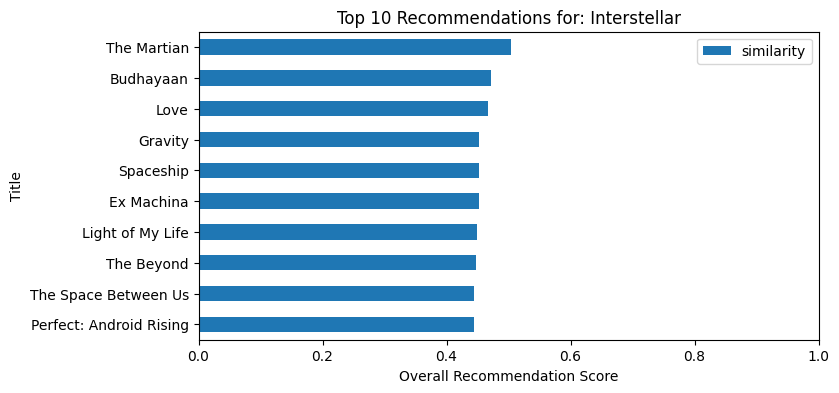

In [155]:
# Notebook
# Bar chart of top-N recommendation scores
recs = recommend("Interstellar", top_n=10, pretty=False)
ax = recs.iloc[::-1].plot.barh(x='title', y='similarity', figsize=(8,4))
ax.set_xlabel('Overall Recommendation Score')
ax.set_ylabel('Title')
ax.set_title('Top 10 Recommendations for: Interstellar')
ax.set_xlim(0, 1.0)

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


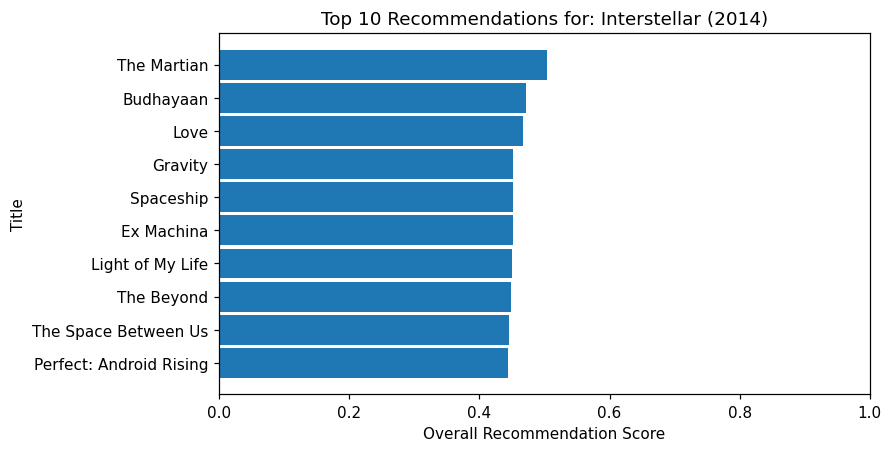

In [156]:
# Streamlit
# Bar chart of top-N recommendation scores
def plot_topn_scores_fig(title, top_n=10, figsize=(8,4), dpi=110):
    base_title, _, _ = _base_title(title)
    
    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return None
    
    titles = recs['title'].to_list()
    scores = recs['similarity'].to_numpy(float)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)
    
    y = np.arange(len(titles))
    ax.barh(y, scores, height=0.9)
    ax.set_yticks(y, titles)
    ax.invert_yaxis()
    ax.set_xlabel('Overall Recommendation Score')
    ax.set_ylabel('Title')
    ax.set_title(f"Top {top_n} Recommendations for: {base_title}")
    ax.set_xlim(0, 1.0)
    
    plt.close(fig)
    return fig

    # plt.show() # for Notebook / comment out for Streamlit
    # plt.close(fig) (uncomment for Streamlit)
    # return fig (uncomment for Streamlit)

plot_topn_scores_fig("Interstellar")

### Visualization 2 - Similarity Score Distribution Histogram

Top 200 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


Text(0, 0.5, 'Count')

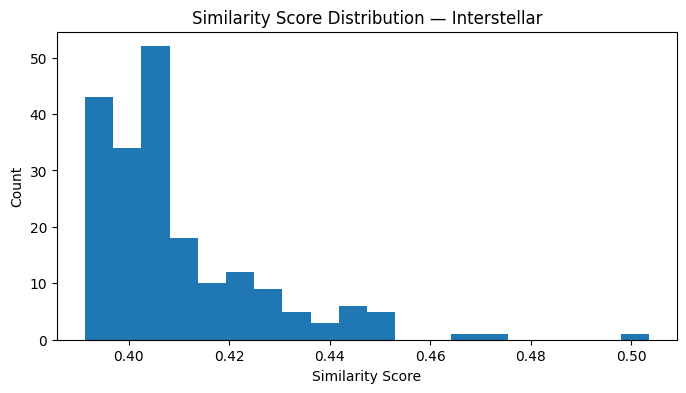

In [157]:
# Notebook
# Similarity score distribution histogram
rec = recommend("Interstellar", top_n=200, pretty=False)
ax = rec['similarity'].plot(kind='hist', bins=20, figsize=(8,4), title='Similarity Score Distribution — Interstellar')
ax.set_xlabel('Similarity Score')
ax.set_ylabel('Count')

Top 200 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


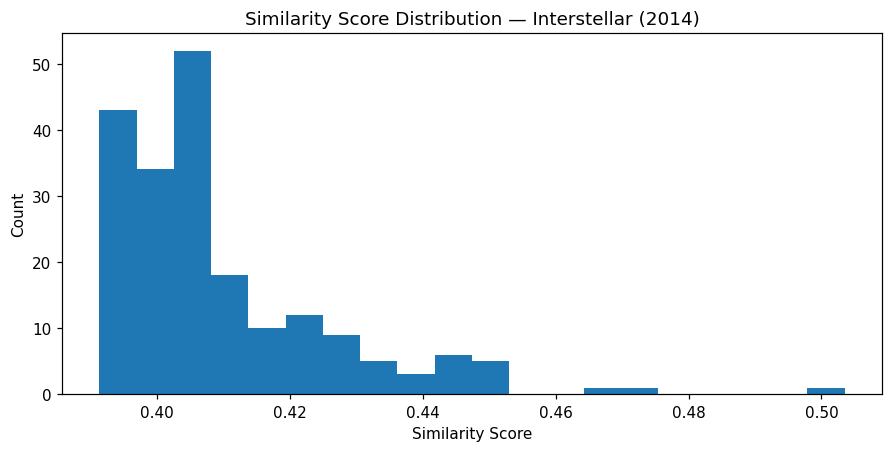

In [165]:
# Streamlit
# Similarity score distribution histogram
def plot_score_distribution_fig(title, top_n=200, bins=20, figsize=(8,4), dpi=110):
    base_title, _, _ = _base_title(title)
    
    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return None
    
    scores = recs['similarity'].to_numpy(float)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)
    
    ax.hist(scores, bins=bins)
    ax.set_xlabel('Similarity Score')
    ax.set_ylabel('Count')
    ax.set_title(f"Similarity Score Distribution — {base_title}")

    plt.close(fig)
    return fig
    
    # plt.show() # for Notebook / comment out for Streamlit
    # plt.close(fig) (uncomment for Streamlit)
    # return fig (uncomment for Streamlit)
    
plot_score_distribution_fig("Interstellar")

### Visualization 3 - Score Breakdown Stacked Horizontal Bar Chart

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


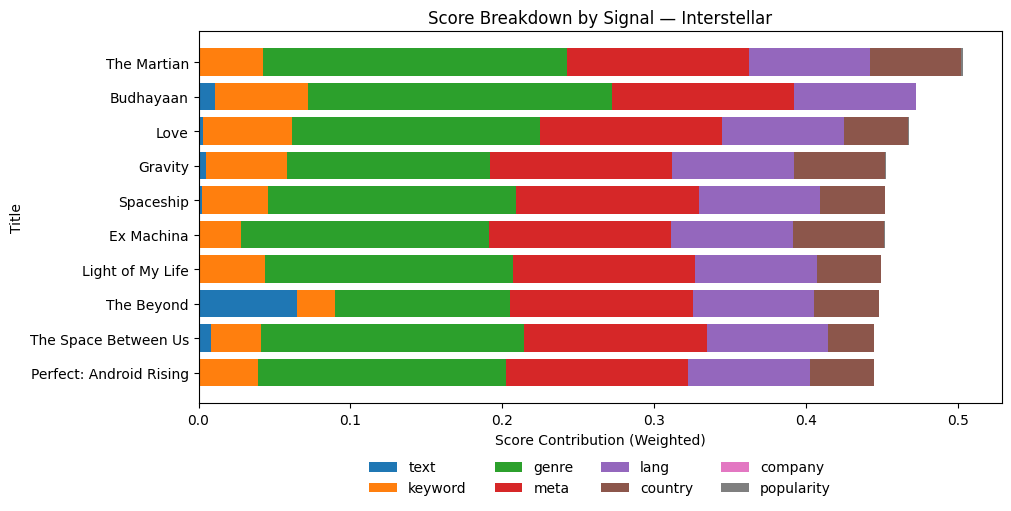

In [159]:
# Notebook
# Score breakdown by signal
title = "Interstellar"

signals = list(WEIGHTS)

base_title, _, base_pos = _base_title(title)

recs = recommend(title, top_n=10, pretty=False)

sims = compute_similarities(base_pos)
if 'id' in recs.columns and 'id' in ml_df.columns:
    labels = (ml_df.reset_index().
              merge(recs[['id']], on='id', how='right')['index'].to_numpy())
else:
    labels = (ml_df.reset_index()
              .merge(recs[['title','release_year']], on=['title','release_year'], how='right')['index'].to_numpy())
idx = ml_df.index.get_indexer(labels)

parts = np.vstack([WEIGHTS[s] * sims[s][idx] for s in signals])
pop = ml_df['popularity'].to_numpy(float)
pop_scaled = (pop - np.nanmin(pop)) / (np.nanmax(pop) - np.nanmin(pop) + 1e-9)
parts = np.vstack([parts, 0.05 * pop_scaled[idx]])
labels = list(WEIGHTS.keys()) + ['popularity']

y = np.arange(len(recs))
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
left = np.zeros(len(recs))
for row, lab in zip(parts, labels):
    ax.barh(y, row, left=left, label=lab)
    left += row

ax.set_yticks(y, recs['title'].values)
ax.invert_yaxis()
ax.set_xlabel('Score Contribution (Weighted)')
ax.set_ylabel('Title')
ax.set_title(f"Score Breakdown by Signal — {title}")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

plt.show()

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


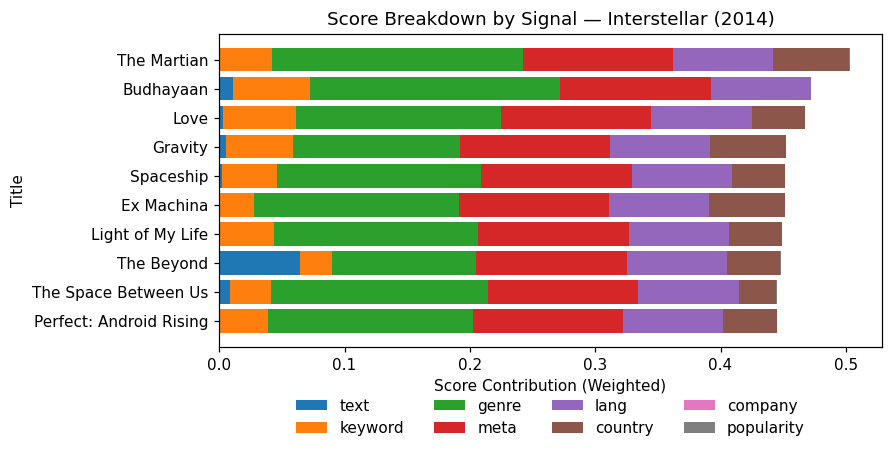

In [160]:
# Streamlit
# Score breakdown by signal
def plot_score_breakdown_fig(title, top_n=10, figsize=(8,4), dpi=110):
    signals = list(WEIGHTS)

    base_title, _, base_pos = _base_title(title)
    if base_pos is None:
        return None

    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return None

    # Align Top-N rows back to master df by (title, release_year)
    labels = (ml_df.reset_index()
              .merge(recs[['title','release_year']], on=['title','release_year'],
                     how='right')['index'].to_numpy())
    idx = ml_df.index.get_indexer(labels)

    sims = compute_similarities(int(base_pos))
    parts = np.vstack([WEIGHTS[s] * sims[s][idx] for s in signals])

    # Popularity bump part (same as recommend)
    pop = ml_df['popularity'].to_numpy(float)
    pop_scaled = (pop - np.nanmin(pop)) / (np.nanmax(pop) - np.nanmin(pop) + 1e-9)
    parts = np.vstack([parts, 0.05 * pop_scaled[idx]])
    legend_labels = signals + ['popularity']

    y = np.arange(len(recs))
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)
    left = np.zeros(len(recs))
    for row, lab in zip(parts, legend_labels):
        ax.barh(y, row, left=left, label=lab)
        left += row

    ax.set_yticks(y, recs['title'].values)
    ax.invert_yaxis()
    ax.set_xlabel('Score Contribution (Weighted)')
    ax.set_ylabel('Title')
    ax.set_title(f"Score Breakdown by Signal — {base_title}")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

    plt.close(fig)
    return fig

    # plt.show() # for Notebook / comment out for Streamlit
    # plt.close(fig) (uncomment for Streamlit)
    # return fig (uncomment for Streamlit)

plot_score_breakdown_fig("Interstellar")

### Visualization 4 - Token Frequency Categorical Bar Chart

Top 50 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


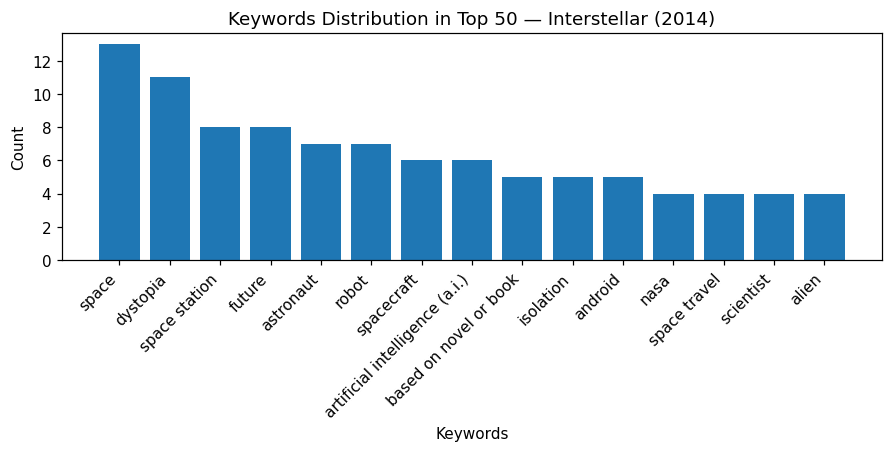

In [161]:
# Token frequency distribution (Keywords or Genres)
from collections import Counter

def plot_dist_fig(title, top_n=50, by='keywords', top_tokens=15, figsize=(8,4), dpi=110):
    base_title, _, _ = _base_title(title)

    col = {'keywords': 'Keywords', 'genres': 'Genres'}.get(str(by).strip().lower())
    if col is None:
        return None

    recs = recommend(title, top_n=top_n, pretty=True)
    if col is None or col not in recs.columns:
        return None

    # split comma-separated tokens
    items = []
    for v in recs[col].fillna('').astype(str).str.replace('_', ' ', regex=False):
        items.extend([t.strip() for t in v.split(',') if t.strip()])

    counts = Counter(items)
    if not counts:
        return None

    labels, nums = zip(*counts.most_common(top_tokens))

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)

    ax.bar(range(len(nums)), nums)
    ax.set_xticks(range(len(labels)), labels, rotation=45, ha='right')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f"{col} Distribution in Top {top_n} — {base_title}")

    plt.close(fig)
    return fig

    # plt.show() # for Notebook / comment out for Streamlit
    # plt.close(fig) (uncomment for Streamlit)
    # return fig (uncomment for Streamlit)

plot_dist_fig("Interstellar", by='keywords')

### Saving Figs to Project Folder

In [162]:
# Save figure files to project folder
# FIGSIZE = (8, 4)
# DPI = 200

# import os
# os.makedirs('figures', exist_ok=True)

# fig = plot_topn_scores_fig("Interstellar", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/topn.png", dpi=DPI, bbox_inches='tight')
# fig = plot_score_distribution_fig("Interstellar", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/dist.png", dpi=DPI, bbox_inches='tight')
# fig = plot_score_breakdown_fig("Interstellar", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/breakdown.png", dpi=DPI, bbox_inches='tight')
# fig = plot_dist_fig("Interstellar", by="keywords", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/tokens.png", dpi=DPI, bbox_inches='tight')

## Explaining Recommendations

In [163]:
def explain_recs(title, top_n=10, weights=None, as_percent=False):
    # Return a table that explains the Top-N picks by:
    #   - raw cosine similarities per signal (text/keyword/genre/meta/lang/country/company)
    #   - weighted contribution from each signal
    #   - popularity bump used in the final score
    #   - total score (same ordering as recommend)
    
    # 1) get Top-N
    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return recs  # return empty df

    # 2) resolve base and pull similarities
    base_index, base_pos = get_base_index(title)
    if base_index is None:
        return recs.iloc[0:0]

    W = weights or {'text':0.25,'keyword':0.25,'genre':0.20,'meta':0.12,'lang':0.08,'country':0.06,'company':0.04}
    signals = list(W)
    sims = compute_similarities(base_pos)  # dict of arrays aligned to ml_df

    # 3) align Top-N rows back to ml_df positions (prefer 'id' if available)
    if 'id' in recs.columns and 'id' in ml_df.columns:
        labels = (ml_df.reset_index()
                    .merge(recs[['id']], on='id', how='right')['index'].to_numpy())
    else:
        labels = (ml_df.reset_index()
                    .merge(recs[['title','release_year']], on=['title','release_year'], how='right')['index'].to_numpy())
    idx = ml_df.index.get_indexer(labels)

    # 4) raw per-signal sims (cosine) for the Top-N, plus contributions = weight * sim
    raw = {s: sims[s][idx] for s in signals}
    contrib = {f"{s}_part": W[s] * raw[s] for s in signals}

    # 5) popularity bump (same as recommender)
    pop = ml_df['popularity'].to_numpy(float)
    pop = (pop - np.nanmin(pop)) / (np.nanmax(pop) - np.nanmin(pop) + 1e-9)
    pop_part = 0.05 * pop[idx]

    # 6) total score = sum(contribs) + pop_part (matches recommend’s blend)
    total = pop_part.copy()
    for s in signals:
        total += contrib[f"{s}_part"]

    # 7) build the explanation table in the same order as recs
    out = recs[['title','release_year']].copy()

    # raw sims (nice to inspect)
    out['text_sim'] = raw['text']
    out['keyword_sim'] = raw['keyword']
    out['genre_sim'] = raw['genre']
    out['meta_sim'] = raw['meta']
    out['lang_sim'] = raw['lang']
    out['country_sim'] = raw['country']
    out['company_sim'] = raw['company']

    # contributions
    out['text_part'] = contrib['text_part']
    out['keyword_part'] = contrib['keyword_part']
    out['genre_part'] = contrib['genre_part']
    out['meta_part'] = contrib['meta_part']
    out['lang_part'] = contrib['lang_part']
    out['country_part'] = contrib['country_part']
    out['company_part'] = contrib['company_part']

    # popularity + total
    out['pop_part'] = pop_part
    out['score'] = total

    if as_percent:
        pct_cols = ['text_sim','keyword_sim','genre_sim','meta_sim','lang_sim','country_sim','company_sim',
                    'text_part','keyword_part','genre_part','meta_part','lang_part','country_part','company_part',
                    'pop_part','score']
        out[pct_cols] = (out[pct_cols] * 100).round(1)

    return out

explain_recs("Interstellar", top_n=10)

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


,title,release_year,text_sim,keyword_sim,genre_sim,meta_sim,lang_sim,country_sim,company_sim,text_part,keyword_part,genre_part,meta_part,lang_part,country_part,company_part,pop_part,score
0,The Martian,2015,0.000000,0.168880,1.000000,1.0,1.0,1.000000,0.0,0.000000,0.042220,0.200000,0.12,0.08,0.060000,0.0,0.001269,0.503489
1,Budhayaan,2016,0.042585,0.246183,1.000000,1.0,1.0,0.000000,0.0,0.010646,0.061546,0.200000,0.12,0.08,0.000000,0.0,0.000010,0.472202
2,Love,2011,0.012565,0.233550,0.816497,1.0,1.0,0.707107,0.0,0.003141,0.058387,0.163299,0.12,0.08,0.042426,0.0,0.000185,0.467439
3,Gravity,2013,0.020784,0.213201,0.666667,1.0,1.0,1.000000,0.0,0.005196,0.053300,0.133333,0.12,0.08,0.060000,0.0,0.000518,0.452348
4,Spaceship,2016,0.009831,0.174078,0.816497,1.0,1.0,0.707107,0.0,0.002458,0.043519,0.163299,0.12,0.08,0.042426,0.0,0.000018,0.451721
5,Ex Machina,2015,0.000000,0.111340,0.816497,1.0,1.0,1.000000,0.0,0.000000,0.027835,0.163299,0.12,0.08,0.060000,0.0,0.000447,0.451581
6,Light of My Life,2019,0.000000,0.174078,0.816497,1.0,1.0,0.707107,0.0,0.000000,0.043519,0.163299,0.12,0.08,0.042426,0.0,0.000154,0.449399
7,The Beyond,2018,0.258521,0.100504,0.577350,1.0,1.0,0.707107,0.0,0.064630,0.025126,0.115470,0.12,0.08,0.042426,0.0,0.000178,0.447830
8,The Space Between Us,2017,0.033613,0.131590,0.866025,1.0,1.0,0.500000,0.0,0.008403,0.032898,0.173205,0.12,0.08,0.030000,0.0,0.000231,0.444737
9,Perfect: Android Rising,2013,0.000000,0.155700,0.816497,1.0,1.0,0.707107,0.0,0.000000,0.038925,0.163299,0.12,0.08,0.042426,0.0,0.000029,0.444680
